# Dry Beans Classification

### 1. Characterization of features

In [88]:
import os
import numpy as np
import pandas as pd
import shutil
import warnings

warnings.filterwarnings('ignore')

file_path = "DryBeanDataSet.xlsx"

output_images = "images/"
output_tables = "tables/"

if os.path.exists(output_images):
    shutil.rmtree(output_images) 
os.makedirs(output_images)


if os.path.exists(output_tables):
    shutil.rmtree(output_tables)  
os.makedirs(output_tables)

In [89]:
import pandas as pd

df = pd.read_excel(file_path)
df.replace('?', np.nan, inplace=True)
# Convert columns to numeric if possible
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='ignore')

# Create a summary DataFrame with the desired metrics
summary = pd.DataFrame({
    'Feature': df.columns,
    'Data Type': df.dtypes.values,
    'Number of Unique Values': df.nunique().values,
    'Mean': [f"{df[col].mean():.2f}" if df[col].dtype in ['float64', 'int64'] else None for col in df.columns],
    'Standard Deviation': [f"{df[col].std():.2f}" if df[col].dtype in ['float64', 'int64'] else None for col in df.columns],
    'Min': [f"{df[col].min():.2f}" if df[col].dtype in ['float64', 'int64'] else None for col in df.columns],
    'Max': [f"{df[col].max():.2f}" if df[col].dtype in ['float64', 'int64'] else None for col in df.columns],
    'Median': [f"{df[col].median():.2f}" if df[col].dtype in ['float64', 'int64'] else None for col in df.columns]
})

# Print summary
print("Unified Features Summary")
display(summary)

# Convert to LaTeX format
latex_code = summary.to_latex(index=False, column_format='|l|l|l|r|r|r|r|r|r|r|', float_format="%.2f", caption="Summary of Features")

with open(f"{output_tables}feature_summary.tex", "w") as file:
    file.write(latex_code)

print(df.shape)

Unified Features Summary


Feature Data Type  Number of Unique Values      Mean  \
0              Area     int64                    12011  53048.28   
1         Perimeter   float64                    13351    855.28   
2   MajorAxisLength   float64                    13543    320.14   
3   MinorAxisLength   float64                    13543    202.27   
4      AspectRation   float64                    13543      1.58   
5      Eccentricity   float64                    13543      0.75   
6        ConvexArea     int64                    12066  53765.69   
7      Constantness     int64                        2      0.90   
8     EquivDiameter   float64                    12012    476.25   
9            Colour    object                        4      None   
10           Extent   float64                    13529      0.75   
11         Solidity   float64                    13526      0.99   
12        roundness   float64                    13543      0.87   
13      Compactness   float64                    13525      0.80   
14     ShapeFactor1   float64                    13543      0.01   
15     ShapeFactor2   float64                    13543      0.00   
16     ShapeFactor3   float64                    13543      0.64   
17     ShapeFactor4   float64                    13611      2.37   
18     ShapeFactor5   float64                    13543      1.00   
19     ShapeFactor6   float64                    13606     89.36   
20            Class    object                        7      None   
21       Sort order   float64                    13611      0.50   

   Standard Deviation       Min         Max    Median  
0            29324.10  20420.00   254616.00  44652.00  
1              214.29    524.74     1985.37    794.94  
2               85.69    183.60      738.86    296.88  
3               44.97    122.51      460.20    192.43  
4                0.25      1.02        2.43      1.55  
5                0.09      0.22        0.91      0.76  
6            29778.01    -30.00   263261.00  45178.00  
7                0.30      0.00        1.00      1.00  
8            25836.87      0.16  3014441.24    238.44  
9                None      None        None      None  
10               0.05      0.56        0.87      0.76  
11               0.00      0.92        0.99      0.99  
12               0.06      0.49        0.99      0.88  
13               0.06      0.64        0.99      0.80  
14               0.00      0.00        0.01      0.01  
15               0.00      0.00        0.00      0.00  
16               0.10      0.41        0.97      0.64  
17               0.87      0.70        3.97      2.37  
18               0.00      0.95        1.00      1.00  
19              51.84      0.00      178.99     88.77  
20               None      None        None      None  
21               0.29      0.00        1.00      0.50

(13611, 22)


In [90]:
df = pd.read_excel(file_path)
df.replace('?', np.nan, inplace=True)

numeric_columns = df.select_dtypes(include=['number']).columns
numeric_summary = pd.DataFrame({
    'Feature': numeric_columns,
    'Data Type': df[numeric_columns].dtypes.values,
    'Number of Missing Values': df[numeric_columns].isnull().sum().values,
    'Number of Unique Values': df[numeric_columns].nunique().values,
    'Mean': df[numeric_columns].mean().values,
    'Standard Deviation': df[numeric_columns].std().values,
    'Min': df[numeric_columns].min().values,
    'Max': df[numeric_columns].max().values
})

# Non-numeric features summary
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
non_numeric_summary = pd.DataFrame({
    'Feature': non_numeric_columns,
    'Data Type': df[non_numeric_columns].dtypes.values,
    'Number of Missing Values': df[non_numeric_columns].isnull().sum().values,
    'Number of Unique Values': df[non_numeric_columns].nunique().values
})

# Display the numeric summary
print("Numeric Features Summary")
display(numeric_summary)

# Display the non-numeric summary
print("\nNon-Numeric Features Summary")
display(non_numeric_summary)

missing_values_count = df.isnull().sum()

missing_values_count = df.isnull().sum()

# Filter to show only columns with more than 1 missing value
missing_values_over_one = missing_values_count[missing_values_count > 0]

# Print the filtered missing values
print(missing_values_over_one)

Numeric Features Summary


Feature Data Type  Number of Missing Values  \
0              Area     int64                         0   
1         Perimeter   float64                         0   
2   MajorAxisLength   float64                         0   
3   MinorAxisLength   float64                         0   
4      AspectRation   float64                         0   
5      Eccentricity   float64                         0   
6        ConvexArea     int64                         0   
7      Constantness     int64                         0   
8     EquivDiameter   float64                         0   
9            Extent   float64                         6   
10         Solidity   float64                         0   
11        roundness   float64                         0   
12      Compactness   float64                        18   
13     ShapeFactor1   float64                         0   
14     ShapeFactor2   float64                         0   
15     ShapeFactor3   float64                         0   
16     ShapeFactor4   float64                         0   
17     ShapeFactor5   float64                         0   
18     ShapeFactor6   float64                         5   
19       Sort order   float64                         0   

    Number of Unique Values          Mean  Standard Deviation           Min  \
0                     12011  53048.284549        29324.095717  20420.000000   
1                     13351    855.283459          214.289696    524.736000   
2                     13543    320.141867           85.694186    183.601165   
3                     13543    202.270714           44.970091    122.512653   
4                     13543      1.583242            0.246678      1.024868   
5                     13543      0.750895            0.092002      0.218951   
6                     12066  53765.692602        29778.009358    -30.000000   
7                         2      0.902873            0.296142      0.000000   
8                     12012    476.254106        25836.865632      0.161417   
9                     13529      0.749747            0.049085      0.555315   
10                    13526      0.987143            0.004660      0.919246   
11                    13543      0.873282            0.059520      0.489618   
12                    13525      0.799886            0.061684      0.640577   
13                    13543      0.006564            0.001128      0.002778   
14                    13543      0.001716            0.000596      0.000564   
15                    13543      0.643590            0.098996      0.410339   
16                    13611      2.368097            0.871619      0.695579   
17                    13543      0.995063            0.004366      0.947687   
18                    13606     89.358603           51.838555      0.000466   
19                    13611      0.500271            0.287926      0.000089   

             Max  
0   2.546160e+05  
1   1.985370e+03  
2   7.388602e+02  
3   4.601985e+02  
4   2.430306e+00  
5   9.114230e-01  
6   2.632610e+05  
7   1.000000e+00  
8   3.014441e+06  
9   8.661946e-01  
10  9.946775e-01  
11  9.906854e-01  
12  9.873030e-01  
13  1.045117e-02  
14  3.664972e-03  
15  9.747672e-01  
16  3.966119e+00  
17  9.997325e-01  
18  1.789850e+02  
19  9.999853e-01


Non-Numeric Features Summary


Feature Data Type  Number of Missing Values  Number of Unique Values
0  Colour    object                         6                        4
1   Class    object                        17                        7

Colour           6
Extent           6
Compactness     18
ShapeFactor6     5
Class           17
dtype: int64


In [91]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_excel(file_path)
df.replace('?', np.nan, inplace=True)

# Define epsilon for floating point comparison tolerance (set for four decimal places)
epsilon = 1e-4

# Helper function to compare floats to four decimal places
def compare_floats(a, b, epsilon=epsilon):
    return abs(a - b) < epsilon

# Helper function to check and verify a feature
def verify_feature(feature_name, computed_values, actual_values, incorrect_indices, missing_values_indices):
    incorrect = actual_values.index[(actual_values.notna()) & (~compare_floats(computed_values, actual_values))]
    missing = actual_values.index[actual_values.isna()]

    incorrect_indices[feature_name].extend(incorrect)
    missing_values_indices[feature_name].extend(missing)

# Initialize dictionaries to keep track of errors or missing values for each feature
features_to_check = ['EquivDiameter', 'ConvexArea', 'AspectRation', 'Solidity', 'Roundness', 'Compactness', 'SF1', 'SF2', 'SF3', 'SF4']
related_features = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter']

# Initialize dictionaries to keep track of errors or missing values for each feature
incorrect_indices = {feature: [] for feature in features_to_check}
missing_values_indices = {feature: [] for feature in features_to_check + related_features}
correct_percentages = {feature: 0 for feature in features_to_check}

# Verify EquivDiameter
if {'Area', 'EquivDiameter'}.issubset(df.columns):
    computed_equiv_diameter = np.sqrt((4 * df['Area']) / np.pi)
    verify_feature('EquivDiameter', computed_equiv_diameter, df['EquivDiameter'], incorrect_indices, missing_values_indices)
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Verify ConvexArea using Solidity
if {'Area', 'ConvexArea', 'Solidity'}.issubset(df.columns):
    computed_convex_area = df['Area'] / df['Solidity']
    verify_feature('ConvexArea', computed_convex_area, df['ConvexArea'], incorrect_indices, missing_values_indices)
    verify_feature('Solidity', df['Area'] / df['ConvexArea'], df['Solidity'], incorrect_indices, missing_values_indices)
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Verify Aspect Ratio
if {'MajorAxisLength', 'MinorAxisLength', 'AspectRation'}.issubset(df.columns):
    computed_aspect_ratio = df['MajorAxisLength'] / df['MinorAxisLength']
    verify_feature('AspectRation', computed_aspect_ratio, df['AspectRation'], incorrect_indices, missing_values_indices)
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])
    missing_values_indices['MinorAxisLength'].extend(df.index[df['MinorAxisLength'].isna()])

# Verify Roundness
if {'Area', 'Perimeter', 'Roundness'}.issubset(df.columns):
    computed_roundness = (4 * np.pi * df['Area']) / (df['Perimeter'] ** 2)
    verify_feature('Roundness', computed_roundness, df['Roundness'], incorrect_indices, missing_values_indices)
    missing_values_indices['Perimeter'].extend(df.index[df['Perimeter'].isna()])
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Verify Compactness
if {'EquivDiameter', 'MajorAxisLength', 'Compactness'}.issubset(df.columns):
    computed_compactness = df['EquivDiameter'] / df['MajorAxisLength']
    verify_feature('Compactness', computed_compactness, df['Compactness'], incorrect_indices, missing_values_indices)
    missing_values_indices['EquivDiameter'].extend(df.index[df['EquivDiameter'].isna()])
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])

# Verify ShapeFactor1 (SF1) and ShapeFactor2 (SF2)
if {'Area', 'MajorAxisLength', 'MinorAxisLength', 'SF1', 'SF2'}.issubset(df.columns):
    computed_sf1 = df['Area'] / (df['MajorAxisLength'] ** 2)
    computed_sf2 = df['Area'] / (df['MinorAxisLength'] ** 2)
    verify_feature('SF1', computed_sf1, df['SF1'], incorrect_indices, missing_values_indices)
    verify_feature('SF2', computed_sf2, df['SF2'], incorrect_indices, missing_values_indices)
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])
    missing_values_indices['MinorAxisLength'].extend(df.index[df['MinorAxisLength'].isna()])
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Verify ShapeFactor3 (SF3)
if {'MajorAxisLength', 'MinorAxisLength', 'SF3'}.issubset(df.columns):
    computed_sf3 = df['MinorAxisLength'] / df['MajorAxisLength']
    verify_feature('SF3', computed_sf3, df['SF3'], incorrect_indices, missing_values_indices)
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])
    missing_values_indices['MinorAxisLength'].extend(df.index[df['MinorAxisLength'].isna()])

# Verify ShapeFactor4 (SF4)
if {'MajorAxisLength', 'MinorAxisLength', 'Area', 'SF4'}.issubset(df.columns):
    computed_sf4 = (df['MajorAxisLength'] * df['MinorAxisLength'] * np.pi) / df['Area']
    verify_feature('SF4', computed_sf4, df['SF4'], incorrect_indices, missing_values_indices)
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])
    missing_values_indices['MinorAxisLength'].extend(df.index[df['MinorAxisLength'].isna()])
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Calculate the percentage of correct values for each feature
for feature in features_to_check:
    total_values = len(df) - len(missing_values_indices[feature])  # Total values minus missing
    correct_values = total_values - len(incorrect_indices[feature])  # Total values minus incorrect
    if total_values > 0:  # Avoid division by zero
        correct_percentages[feature] = (correct_values / total_values) * 100

# Remove duplicate indices and sort
for key in incorrect_indices:
    incorrect_indices[key] = sorted(set(incorrect_indices[key]))

for key in missing_values_indices:
    missing_values_indices[key] = sorted(set(missing_values_indices[key]))

# Display the indices with discrepancies, missing values, and correct percentages
for feature in features_to_check:
    if incorrect_indices[feature]:  # Only print if the list is not empty
        print(f"Indices with incorrect {feature} data entries:", incorrect_indices[feature])
    if missing_values_indices[feature]:  # Only print if the list is not empty
        print(f"Indices with missing values in {feature}:", missing_values_indices[feature])
    print(f"Percentage of correct {feature} values: {correct_percentages[feature]:.2f}%")

for feature in related_features:
    if missing_values_indices[feature]:  # Only print if the list is not empty
        print(f"Indices with missing values in {feature}:", missing_values_indices[feature])


Indices with incorrect EquivDiameter data entries: [2762, 4780, 5884]
Percentage of correct EquivDiameter values: 99.98%
Indices with incorrect ConvexArea data entries: [3941]
Percentage of correct ConvexArea values: 99.99%
Percentage of correct AspectRation values: 100.00%
Indices with incorrect Solidity data entries: [3941]
Percentage of correct Solidity values: 99.99%
Percentage of correct Roundness values: 100.00%
Indices with incorrect Compactness data entries: [2762, 4780, 5884]
Indices with missing values in Compactness: [104, 484, 788, 902, 1244, 2042, 2803, 3982, 5963, 8813, 9701, 9702, 9914, 10015, 10134, 10234, 10294, 10325]
Percentage of correct Compactness values: 99.98%
Percentage of correct SF1 values: 100.00%
Percentage of correct SF2 values: 100.00%
Percentage of correct SF3 values: 100.00%
Percentage of correct SF4 values: 100.00%


In [92]:
row_indices = incorrect_indices["EquivDiameter"]  # Ensure this is a list of integers
print(df.iloc[row_indices])

row_indices = incorrect_indices["Solidity"]  # Ensure this is a list of integers
print(df.iloc[row_indices])

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2762  45750    798.725       304.884846       191.451613      1.592490   
4780  71368   1067.432       386.666468       235.813610      1.639712   
5884  20464    528.408       191.249312       136.368462      1.402445   

      Eccentricity  ConvexArea  Constantness  EquivDiameter Colour  ...  \
2762      0.778256       46099             1   2.410035e+04  brown  ...   
4780      0.792507       72557             1   3.014441e+06  brown  ...   
5884      0.701123       20772             1   1.614174e-01  black  ...   

      roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
2762   0.901169     0.791616      0.006664      0.001614      0.626656   
4780   0.787106     0.779597      0.005418      0.001235      0.607772   
5884   0.921004     0.844016      0.009346      0.002925      0.712362   

      ShapeFactor4  ShapeFactor5  ShapeFactor6     Class  Sort order  
2762      2.751714      0.997944  

Regression line: ConvexArea = 1.0153 * Area + -92.3497
R² value: 0.9999
Corrected ConvexArea for index 3941: 34163.2584
New Solidity for index 3941: 0.9876


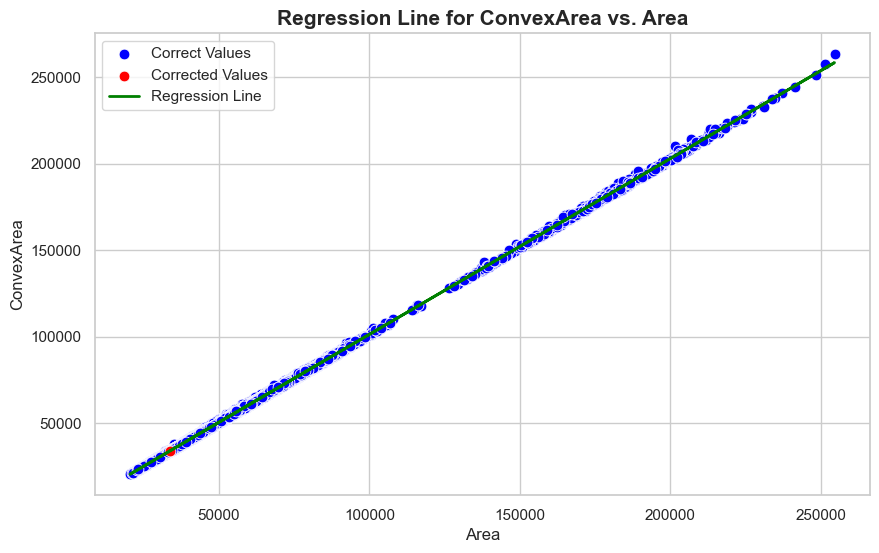

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_excel(file_path)
df.replace('?', np.nan, inplace=True)

# Identify indices where ConvexArea was found to be incorrect
incorrect_convex_area_indices = incorrect_indices['ConvexArea']

# Prepare data for regression, excluding rows with missing values or identified incorrect ConvexArea
valid_data = df.drop(index=incorrect_convex_area_indices)
valid_data = valid_data.dropna(subset=['Area', 'ConvexArea'])

# Reshape data for sklearn
X = valid_data['Area'].values.reshape(-1, 1)
y = valid_data['ConvexArea'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Output the slope and intercept of the regression model
slope = model.coef_[0]
intercept = model.intercept_
print(f"Regression line: ConvexArea = {slope:.4f} * Area + {intercept:.4f}")

# Calculate and display the R² value
r_squared = model.score(X, y)
print(f"R² value: {r_squared:.4f}")

# Predict ConvexArea for the incorrect indices
predicted_convex_area = model.predict(df.loc[incorrect_convex_area_indices, 'Area'].values.reshape(-1, 1))

# Create a new DataFrame df_v1 with the corrected ConvexArea values
df_v1 = df.copy()
df_v1.loc[incorrect_convex_area_indices, 'ConvexArea'] = predicted_convex_area

# Recalculate Solidity using the corrected ConvexArea in df_v1
df_v1['Solidity'] = df_v1['Area'] / df_v1['ConvexArea']

# Display the updated value for ConvexArea and Solidity for the specific example where ConvexArea was -30
example_index = incorrect_convex_area_indices[0]  # Assuming this is the index where ConvexArea was -30
print(f"Corrected ConvexArea for index {example_index}: {df_v1.loc[example_index, 'ConvexArea']:.4f}")
print(f"New Solidity for index {example_index}: {df_v1.loc[example_index, 'Solidity']:.4f}")

# Plot the regression line and corrected points with Seaborn styling
sns.set(style='whitegrid')  # Set the style to whitegrid
plt.figure(figsize=(10, 6))

# Scatter plot for correct values
sns.scatterplot(x='Area', y='ConvexArea', data=valid_data, color='blue', label='Correct Values', s=60)

# Scatter plot for corrected values
sns.scatterplot(x=df.loc[incorrect_convex_area_indices, 'Area'], 
                y=df_v1.loc[incorrect_convex_area_indices, 'ConvexArea'], 
                color='red', label='Corrected Values', s=60)

# Plot the regression line
plt.plot(X, model.predict(X), color='green', label='Regression Line', linewidth=2)

# Adding titles and labels with improved fonts
plt.xlabel('Area', fontsize=12)
plt.ylabel('ConvexArea', fontsize=12)
plt.title('Regression Line for ConvexArea vs. Area', fontsize=15, fontweight='bold')
plt.legend()
plt.show()


In [94]:
# Create a new DataFrame df_v2 from df_v1
df_v2 = df_v1.copy()

# Impute missing Compactness values using the formula Compactness = EquivDiameter / MajorAxisLength
missing_compactness_indices = missing_values_indices['Compactness']
df_v2.loc[missing_compactness_indices, 'Compactness'] = df_v2.loc[missing_compactness_indices, 'EquivDiameter'] / df_v2.loc[missing_compactness_indices, 'MajorAxisLength']

# Recalculate EquivDiameter using its formula for incorrect indices
incorrect_equiv_diameter_indices = incorrect_indices['EquivDiameter']
df_v2.loc[incorrect_equiv_diameter_indices, 'EquivDiameter'] = np.sqrt((4 * df_v2.loc[incorrect_equiv_diameter_indices, 'Area']) / np.pi)

# Recalculate Compactness for these same incorrect EquivDiameter indices
df_v2.loc[incorrect_equiv_diameter_indices, 'Compactness'] = df_v2.loc[incorrect_equiv_diameter_indices, 'EquivDiameter'] / df_v2.loc[incorrect_equiv_diameter_indices, 'MajorAxisLength']

# Display the updated values for the specific example indices
for idx in incorrect_equiv_diameter_indices:
    print(f"Corrected EquivDiameter for index {idx}: {df_v2.loc[idx, 'EquivDiameter']:.4f}")
    print(f"Updated Compactness for index {idx}: {df_v2.loc[idx, 'Compactness']:.4f}")

# Print imputed Compactness values
print("Imputed Compactness values at missing indices:")
for idx in missing_compactness_indices:
    print(f"Index {idx}: Compactness = {df_v2.loc[idx, 'Compactness']:.4f}")


Corrected EquivDiameter for index 2762: 241.3518
Updated Compactness for index 2762: 0.7916
Corrected EquivDiameter for index 4780: 301.4441
Updated Compactness for index 4780: 0.7796
Corrected EquivDiameter for index 5884: 161.4174
Updated Compactness for index 5884: 0.8440
Imputed Compactness values at missing indices:
Index 104: Compactness = 0.7954
Index 484: Compactness = 0.7364
Index 788: Compactness = 0.7023
Index 902: Compactness = 0.8232
Index 1244: Compactness = 0.8799
Index 2042: Compactness = 0.7095
Index 2803: Compactness = 0.8237
Index 3982: Compactness = 0.6998
Index 5963: Compactness = 0.9001
Index 8813: Compactness = 0.8972
Index 9701: Compactness = 0.9001
Index 9702: Compactness = 0.7599
Index 9914: Compactness = 0.8858
Index 10015: Compactness = 0.6813
Index 10134: Compactness = 0.7156
Index 10234: Compactness = 0.7269
Index 10294: Compactness = 0.7791
Index 10325: Compactness = 0.6844


In [95]:
import pandas as pd
import numpy as np

# Load the data
df = df_v2.copy()
# Define epsilon for floating point comparison tolerance (set for four decimal places)
epsilon = 1e-4

# Helper function to compare floats to four decimal places
def compare_floats(a, b, epsilon=epsilon):
    return abs(a - b) < epsilon

# Helper function to check and verify a feature
def verify_feature(feature_name, computed_values, actual_values, incorrect_indices, missing_values_indices):
    incorrect = actual_values.index[(actual_values.notna()) & (~compare_floats(computed_values, actual_values))]
    missing = actual_values.index[actual_values.isna()]

    incorrect_indices[feature_name].extend(incorrect)
    missing_values_indices[feature_name].extend(missing)

# Initialize dictionaries to keep track of errors or missing values for each feature
features_to_check = ['EquivDiameter', 'ConvexArea', 'AspectRation', 'Solidity', 'Roundness', 'Compactness', 'SF1', 'SF2', 'SF3', 'SF4']
related_features = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter']

# Initialize dictionaries to keep track of errors or missing values for each feature
incorrect_indices = {feature: [] for feature in features_to_check}
missing_values_indices = {feature: [] for feature in features_to_check + related_features}
correct_percentages = {feature: 0 for feature in features_to_check}

# Verify EquivDiameter
if {'Area', 'EquivDiameter'}.issubset(df.columns):
    computed_equiv_diameter = np.sqrt((4 * df['Area']) / np.pi)
    verify_feature('EquivDiameter', computed_equiv_diameter, df['EquivDiameter'], incorrect_indices, missing_values_indices)
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Verify ConvexArea using Solidity
if {'Area', 'ConvexArea', 'Solidity'}.issubset(df.columns):
    computed_convex_area = df['Area'] / df['Solidity']
    verify_feature('ConvexArea', computed_convex_area, df['ConvexArea'], incorrect_indices, missing_values_indices)
    verify_feature('Solidity', df['Area'] / df['ConvexArea'], df['Solidity'], incorrect_indices, missing_values_indices)
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Verify Aspect Ratio
if {'MajorAxisLength', 'MinorAxisLength', 'AspectRation'}.issubset(df.columns):
    computed_aspect_ratio = df['MajorAxisLength'] / df['MinorAxisLength']
    verify_feature('AspectRation', computed_aspect_ratio, df['AspectRation'], incorrect_indices, missing_values_indices)
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])
    missing_values_indices['MinorAxisLength'].extend(df.index[df['MinorAxisLength'].isna()])

# Verify Roundness
if {'Area', 'Perimeter', 'Roundness'}.issubset(df.columns):
    computed_roundness = (4 * np.pi * df['Area']) / (df['Perimeter'] ** 2)
    verify_feature('Roundness', computed_roundness, df['Roundness'], incorrect_indices, missing_values_indices)
    missing_values_indices['Perimeter'].extend(df.index[df['Perimeter'].isna()])
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Verify Compactness
if {'EquivDiameter', 'MajorAxisLength', 'Compactness'}.issubset(df.columns):
    computed_compactness = df['EquivDiameter'] / df['MajorAxisLength']
    verify_feature('Compactness', computed_compactness, df['Compactness'], incorrect_indices, missing_values_indices)
    missing_values_indices['EquivDiameter'].extend(df.index[df['EquivDiameter'].isna()])
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])

# Verify ShapeFactor1 (SF1) and ShapeFactor2 (SF2)
if {'Area', 'MajorAxisLength', 'MinorAxisLength', 'SF1', 'SF2'}.issubset(df.columns):
    computed_sf1 = df['Area'] / (df['MajorAxisLength'] ** 2)
    computed_sf2 = df['Area'] / (df['MinorAxisLength'] ** 2)
    verify_feature('SF1', computed_sf1, df['SF1'], incorrect_indices, missing_values_indices)
    verify_feature('SF2', computed_sf2, df['SF2'], incorrect_indices, missing_values_indices)
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])
    missing_values_indices['MinorAxisLength'].extend(df.index[df['MinorAxisLength'].isna()])
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Verify ShapeFactor3 (SF3)
if {'MajorAxisLength', 'MinorAxisLength', 'SF3'}.issubset(df.columns):
    computed_sf3 = df['MinorAxisLength'] / df['MajorAxisLength']
    verify_feature('SF3', computed_sf3, df['SF3'], incorrect_indices, missing_values_indices)
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])
    missing_values_indices['MinorAxisLength'].extend(df.index[df['MinorAxisLength'].isna()])

# Verify ShapeFactor4 (SF4)
if {'MajorAxisLength', 'MinorAxisLength', 'Area', 'SF4'}.issubset(df.columns):
    computed_sf4 = (df['MajorAxisLength'] * df['MinorAxisLength'] * np.pi) / df['Area']
    verify_feature('SF4', computed_sf4, df['SF4'], incorrect_indices, missing_values_indices)
    missing_values_indices['MajorAxisLength'].extend(df.index[df['MajorAxisLength'].isna()])
    missing_values_indices['MinorAxisLength'].extend(df.index[df['MinorAxisLength'].isna()])
    missing_values_indices['Area'].extend(df.index[df['Area'].isna()])

# Calculate the percentage of correct values for each feature
for feature in features_to_check:
    total_values = len(df) - len(missing_values_indices[feature])  # Total values minus missing
    correct_values = total_values - len(incorrect_indices[feature])  # Total values minus incorrect
    if total_values > 0:  # Avoid division by zero
        correct_percentages[feature] = (correct_values / total_values) * 100

# Remove duplicate indices and sort
for key in incorrect_indices:
    incorrect_indices[key] = sorted(set(incorrect_indices[key]))

for key in missing_values_indices:
    missing_values_indices[key] = sorted(set(missing_values_indices[key]))

# Display the indices with discrepancies, missing values, and correct percentages
for feature in features_to_check:
    if incorrect_indices[feature]:  # Only print if the list is not empty
        print(f"Indices with incorrect {feature} data entries:", incorrect_indices[feature])
    if missing_values_indices[feature]:  # Only print if the list is not empty
        print(f"Indices with missing values in {feature}:", missing_values_indices[feature])
    print(f"Percentage of correct {feature} values: {correct_percentages[feature]:.2f}%")

for feature in related_features:
    if missing_values_indices[feature]:  # Only print if the list is not empty
        print(f"Indices with missing values in {feature}:", missing_values_indices[feature])


Percentage of correct EquivDiameter values: 100.00%
Percentage of correct ConvexArea values: 100.00%
Percentage of correct AspectRation values: 100.00%
Percentage of correct Solidity values: 100.00%
Percentage of correct Roundness values: 100.00%
Percentage of correct Compactness values: 100.00%
Percentage of correct SF1 values: 100.00%
Percentage of correct SF2 values: 100.00%
Percentage of correct SF3 values: 100.00%
Percentage of correct SF4 values: 100.00%


Median Extent value used for imputation: 0.7599
Imputed Extent values at missing indices (if any):


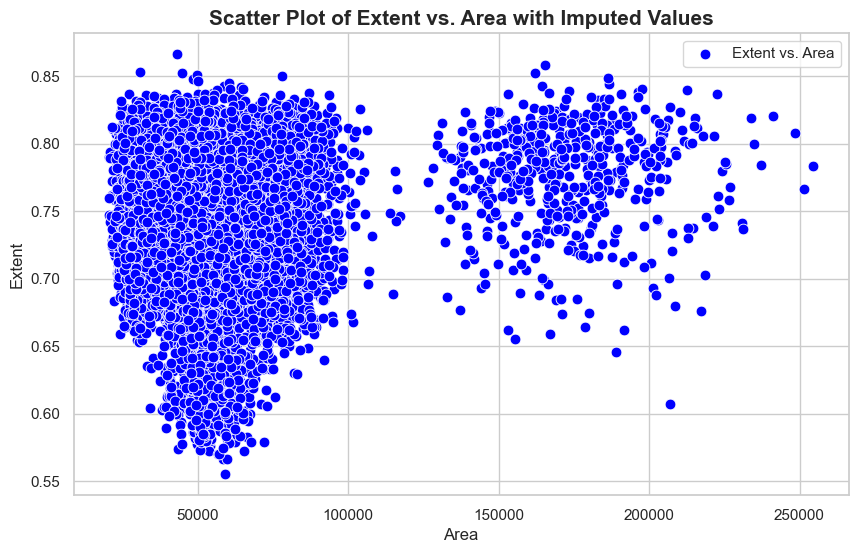

In [96]:
# Create a new DataFrame df_v3 from df_v2
df_v3 = df_v2.copy()

# Calculate the median of the non-missing Extent values
median_extent = df_v3['Extent'].median()

# Impute the missing Extent values with the median
df_v3['Extent'].fillna(median_extent, inplace=True)

# Display the median used for imputation
print(f"Median Extent value used for imputation: {median_extent:.4f}")

# Display the imputed Extent values for the missing indices
missing_extent_indices = df_v3.index[df_v3['Extent'].isna()]  # Should be empty after imputation
print("Imputed Extent values at missing indices (if any):")
for idx in missing_extent_indices:
    print(f"Index {idx}: Extent = {df_v3.loc[idx, 'Extent']:.4f}")

# Plot the imputed Extent values on the scatter plot
sns.set(style='whitegrid')  # Set the style to whitegrid
plt.figure(figsize=(10, 6))

# Scatter plot for Extent vs. Area with imputed values
sns.scatterplot(x='Area', y='Extent', data=df_v3, color='blue', label='Extent vs. Area', s=60)

# Adding titles and labels with improved fonts
plt.xlabel('Area', fontsize=12)
plt.ylabel('Extent', fontsize=12)
plt.title('Scatter Plot of Extent vs. Area with Imputed Values', fontsize=15, fontweight='bold')
plt.legend()
plt.show()


Mean ShapeFactor6 value used for imputation: 89.3586


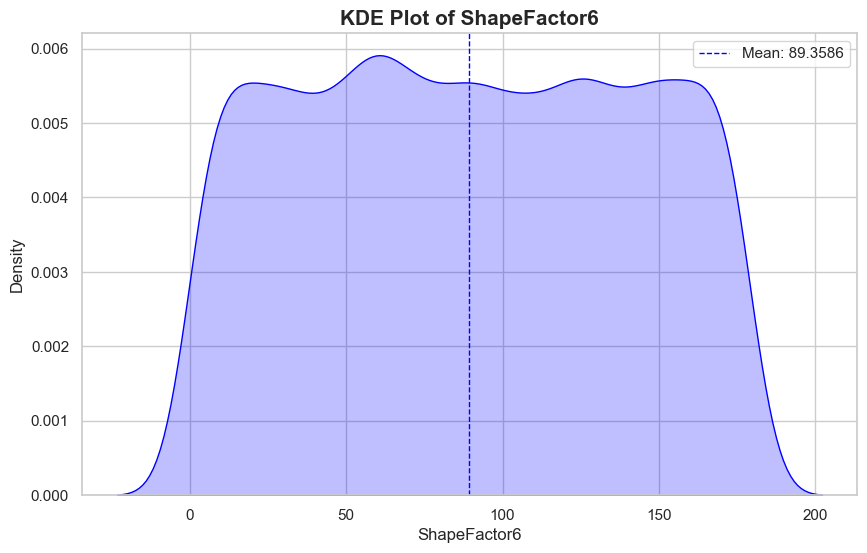

Median Extent value used for imputation: 0.7599


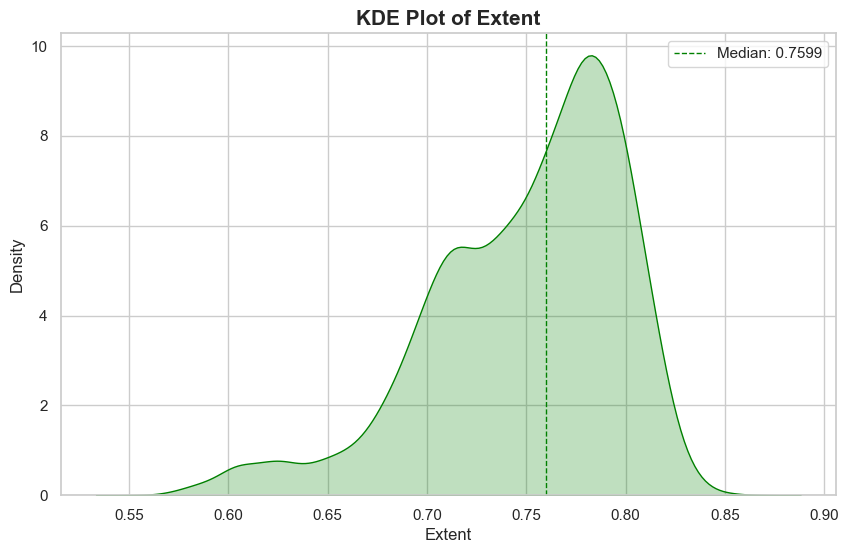

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame df_v4 from df_v3
df_v4 = df_v3.copy()

# Impute missing ShapeFactor values with the mean of available ShapeFactor values
# Assuming the column name for ShapeFactor6 is 'ShapeFactor6' (adjust if necessary)
mean_shape_factor = df_v4['ShapeFactor6'].mean()
df_v4['ShapeFactor6'].fillna(mean_shape_factor, inplace=True)

# Display the mean used for imputation for ShapeFactor6
print(f"Mean ShapeFactor6 value used for imputation: {mean_shape_factor:.4f}")

# Plot KDE for ShapeFactor6 with a dashed line for the mean
plt.figure(figsize=(10, 6))
sns.kdeplot(df_v4['ShapeFactor6'], color='blue', shade=True)
plt.axvline(mean_shape_factor, color='blue', linestyle='--', linewidth=1, label=f'Mean: {mean_shape_factor:.4f}')
plt.xlabel('ShapeFactor6', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('KDE Plot of ShapeFactor6', fontsize=15, fontweight='bold')
plt.legend()
plt.show()

# Impute missing Extent values with the median of available Extent values (if not already done)
# This step assumes Extent was already imputed in df_v3, but we'll ensure completeness
median_extent = df_v4['Extent'].median()
df_v4['Extent'].fillna(median_extent, inplace=True)

# Display the median used for imputation for Extent
print(f"Median Extent value used for imputation: {median_extent:.4f}")

# Plot KDE for Extent with a dashed line for the median
plt.figure(figsize=(10, 6))
sns.kdeplot(df_v4['Extent'], color='green', shade=True)
plt.axvline(median_extent, color='green', linestyle='--', linewidth=1, label=f'Median: {median_extent:.4f}')
plt.xlabel('Extent', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('KDE Plot of Extent', fontsize=15, fontweight='bold')
plt.legend()
plt.show()


Label encoding mapping: {'black': np.int64(0), 'brown': np.int64(1), 'green': np.int64(2), 'white': np.int64(3)}

Counts for each encoded Colour after imputation:
Colour_encoded
1    6121
0    3541
2    2023
3    1926
Name: count, dtype: int64


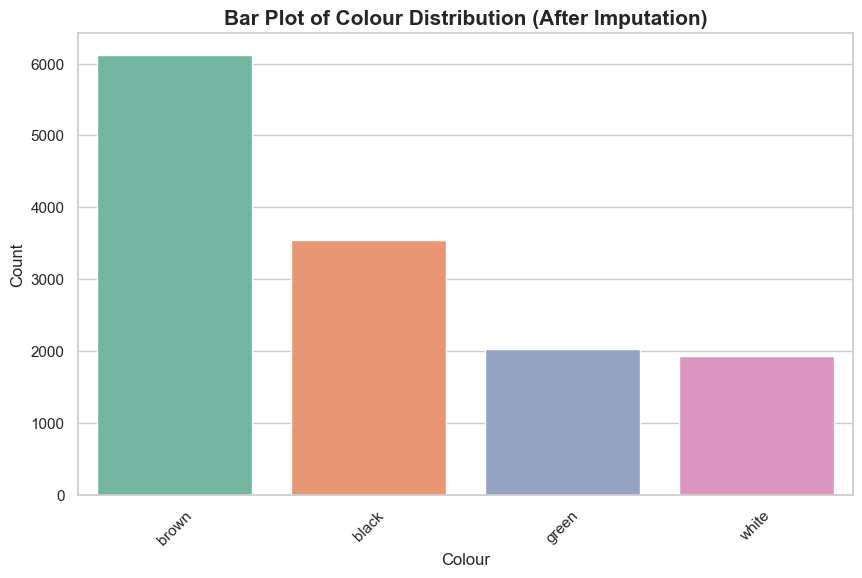

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness',
       'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
       'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4',
       'ShapeFactor5', 'ShapeFactor6', 'Class', 'Sort order', 'Colour_0',
       'Colour_1', 'Colour_2', 'Colour_3'],
      dtype='object')


In [98]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame df_v5 from df_v4
df_v5 = df_v4.copy()

# Impute missing Colour values with the mode of available Colour values
mode_colour = df_v5['Colour'].mode()[0]
df_v5['Colour'].fillna(mode_colour, inplace=True)

# Label encode the 'Colour' feature after imputation
label_encoder = LabelEncoder()
df_v5['Colour_encoded'] = label_encoder.fit_transform(df_v5['Colour'])

# Display the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping:", label_mapping)

# Print counts for each encoded Colour after imputation
colour_counts_after_imputation = df_v5['Colour_encoded'].value_counts()
print("\nCounts for each encoded Colour after imputation:")
print(colour_counts_after_imputation)

# Reverse the label_mapping dictionary to map encoded values back to original labels
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Plot a bar plot for each encoded Colour after imputation using original class names
plt.figure(figsize=(10, 6))

# Mapping encoded values back to their original class names
colour_labels = [reverse_label_mapping[label] for label in colour_counts_after_imputation.index]

sns.barplot(x=colour_labels, y=colour_counts_after_imputation.values, palette='Set2')
plt.xlabel('Colour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bar Plot of Colour Distribution (After Imputation)', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

# One-hot encode the label-encoded 'Colour_encoded' feature
df_v5 = pd.get_dummies(df_v5, columns=['Colour_encoded'], prefix='Colour')

# Plot a bar plot for each original Colour category using the encoded columns
# Count the frequency of each original category by summing the one-hot encoded columns
colour_columns = [col for col in df_v5.columns if col.startswith('Colour_')]
colour_counts = df_v5[colour_columns].sum()

# Correct the label for the final bar plot to ensure human-readable labels if needed.
colour_labels_final = [label.replace('Colour_', '') for label in colour_counts.index]

df_v5.drop(columns="Colour", inplace=True)
print(df_v5.columns)

Label encoding mapping for Class: {'black': np.int64(0), 'brown': np.int64(1), 'green': np.int64(2), 'white': np.int64(3)}

Counts for each class after removing rows with missing values:
Class
DERMASON    3542
SIRA        2634
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1317
BOMBAY       521
Name: count, dtype: int64


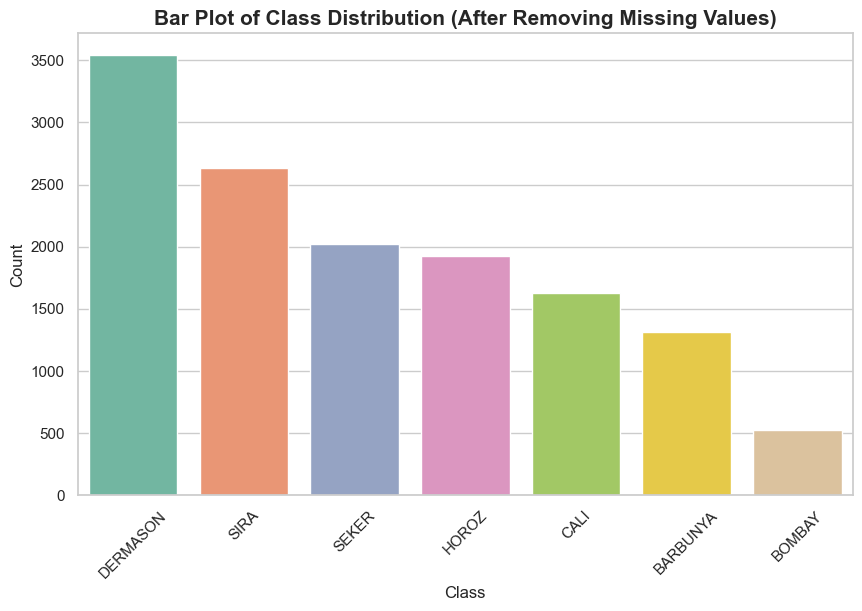

In [99]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame data from df_v5
df_v6 = df_v5.copy()

# Remove rows with any missing values
df_v6.dropna(inplace=True)

# Label encode the 'Class' feature

# Display the mapping of labels
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping for Class:", class_mapping)

# Print counts for each class
class_counts = df_v6['Class'].value_counts()
print("\nCounts for each class after removing rows with missing values:")
print(class_counts)

# Plot a bar plot for each class using the original class labels
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bar Plot of Class Distribution (After Removing Missing Values)', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


## MODELING

In [116]:
from sklearn.model_selection import train_test_split


features = df_v6.drop(columns=['Class'])
target = df_v6['Class']

df_v6_Train, df_v6_Test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

df_v6_Train = df_v6_Train.copy()
df_v6_Train['Class'] = y_train

df_v6_Test = df_v6_Test.copy()
df_v6_Test['Class'] = y_test

print(f"Training set size: {df_v6_Train.shape}")
print(f"Testing set size: {df_v6_Test.shape}")


Training set size: (10875, 25)
Testing set size: (2719, 25)


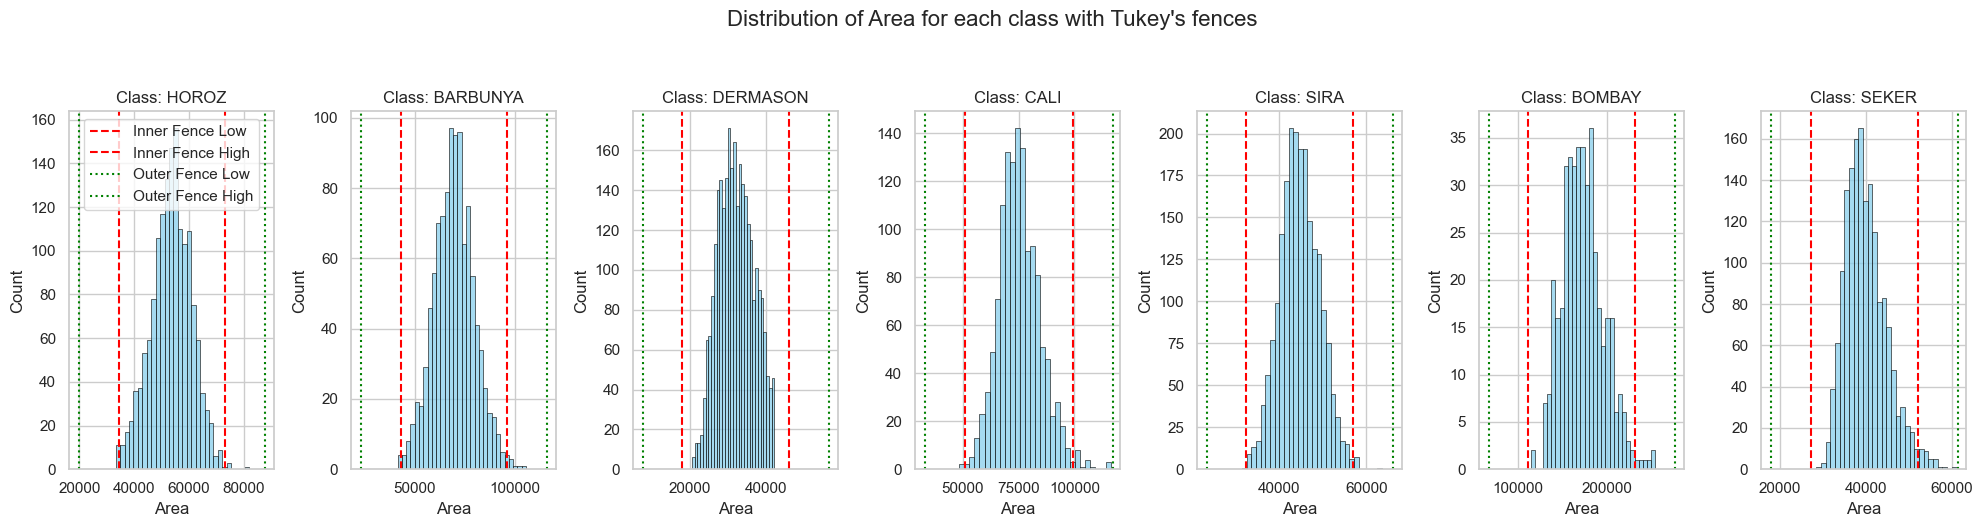

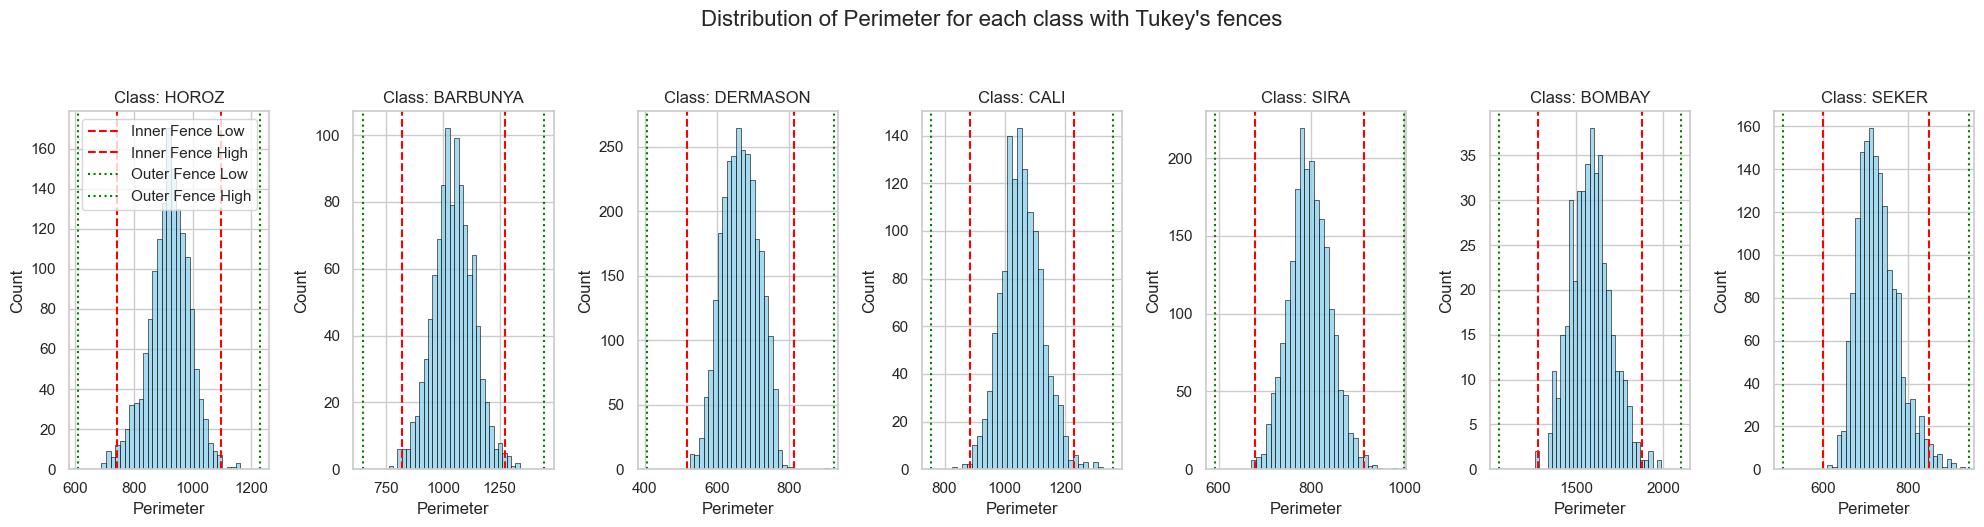

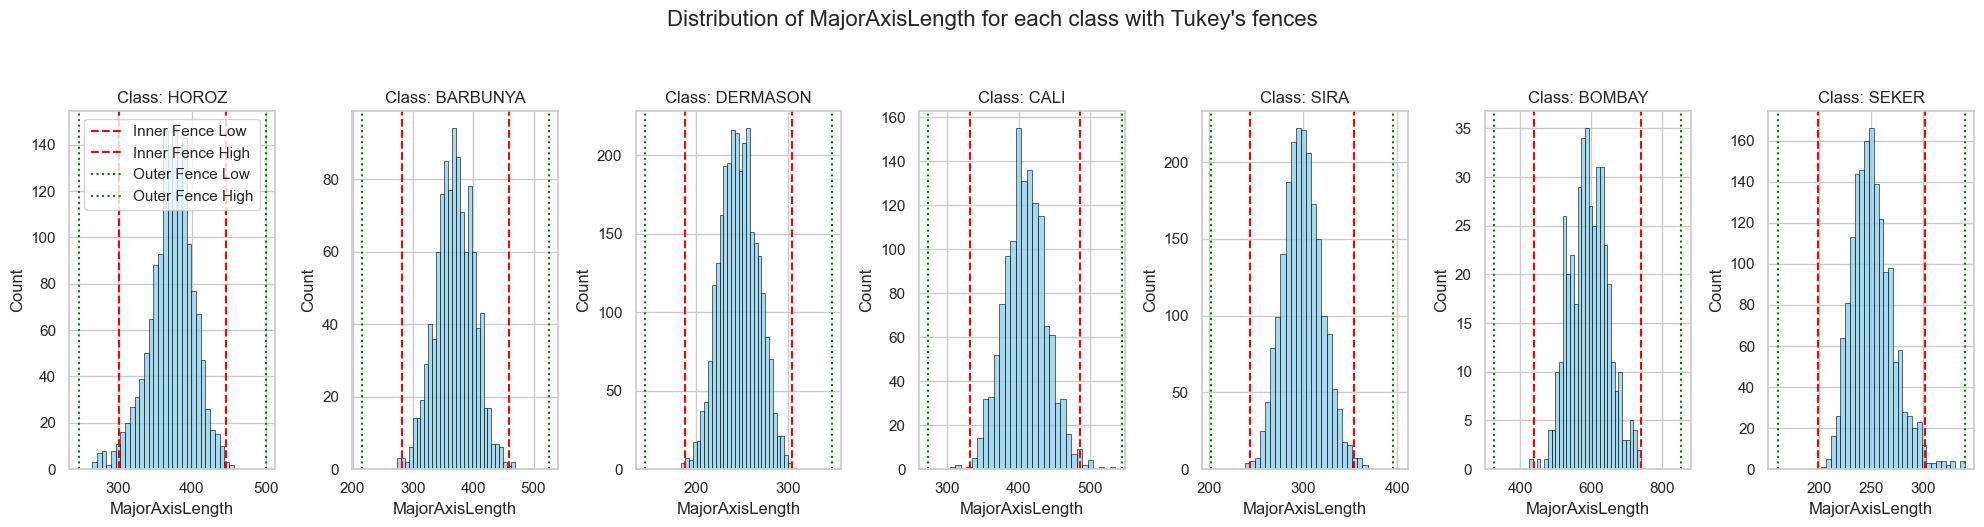

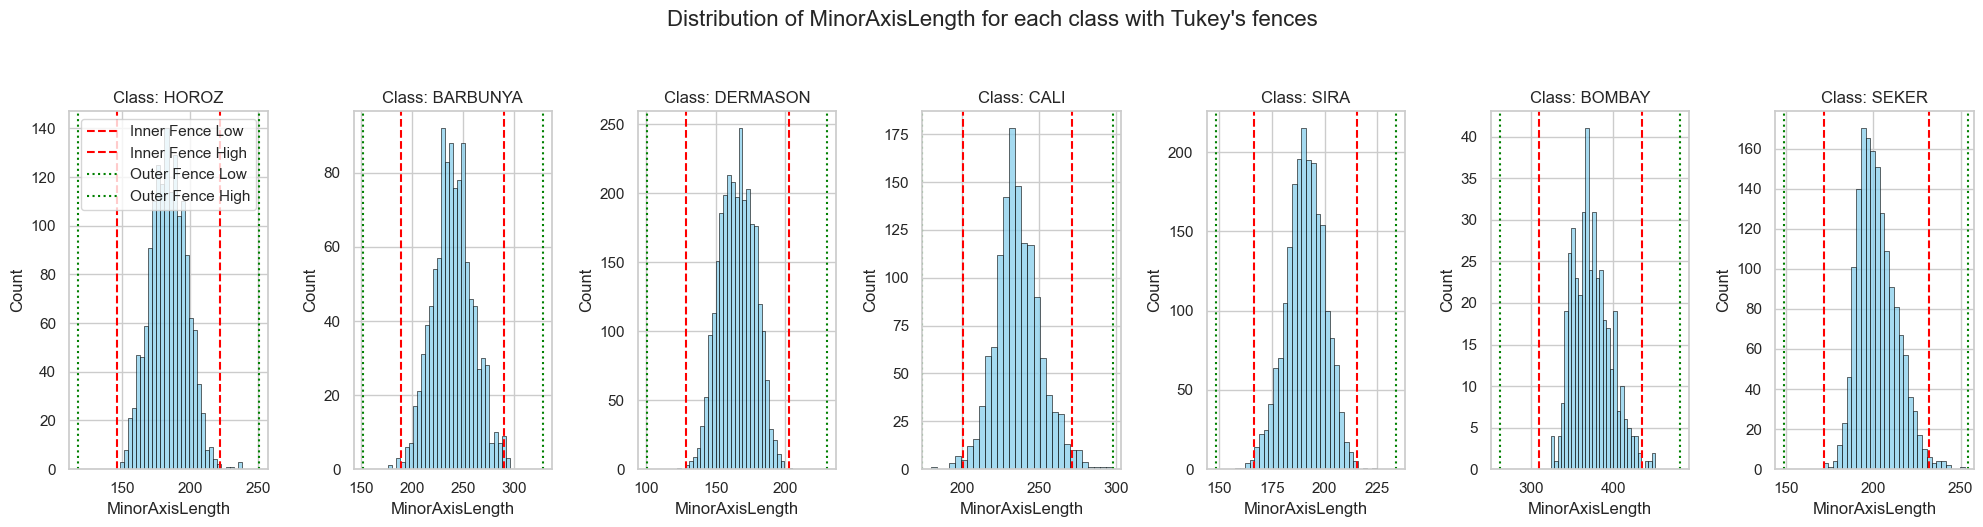

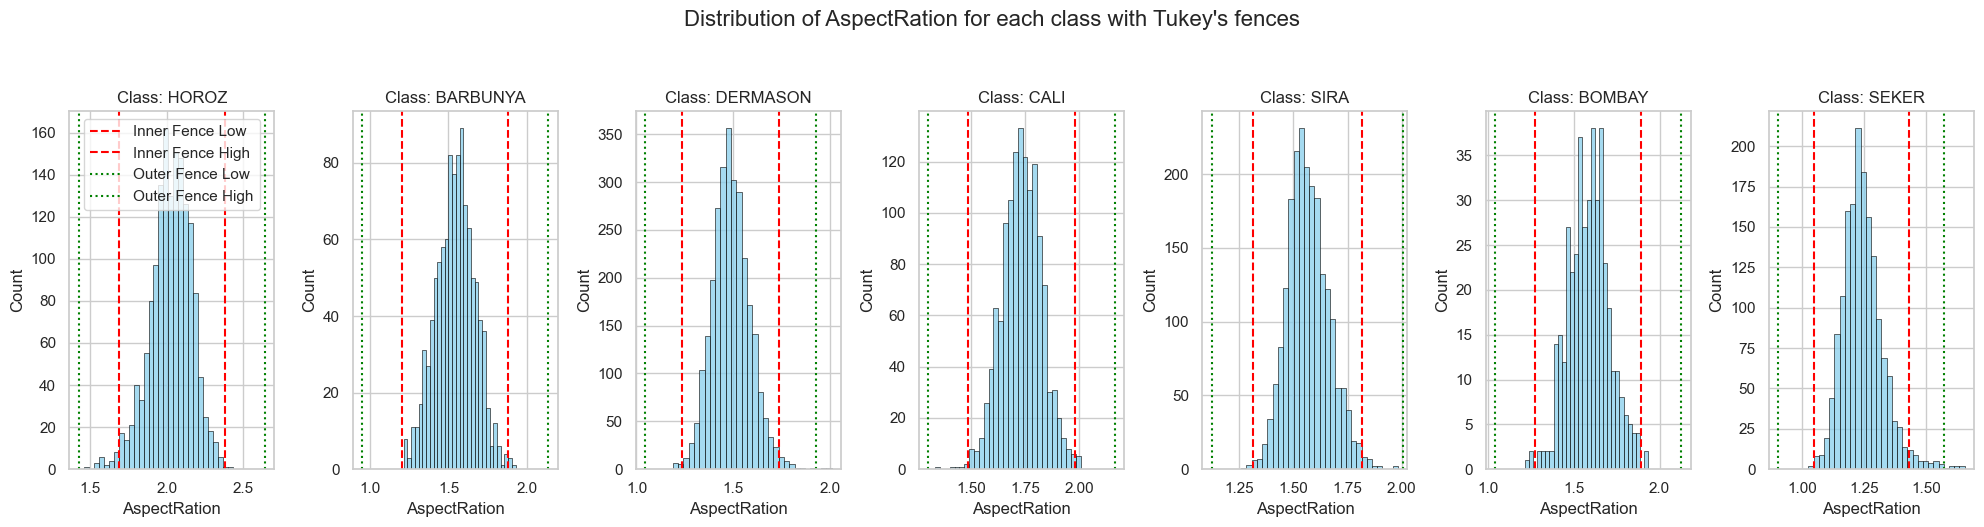

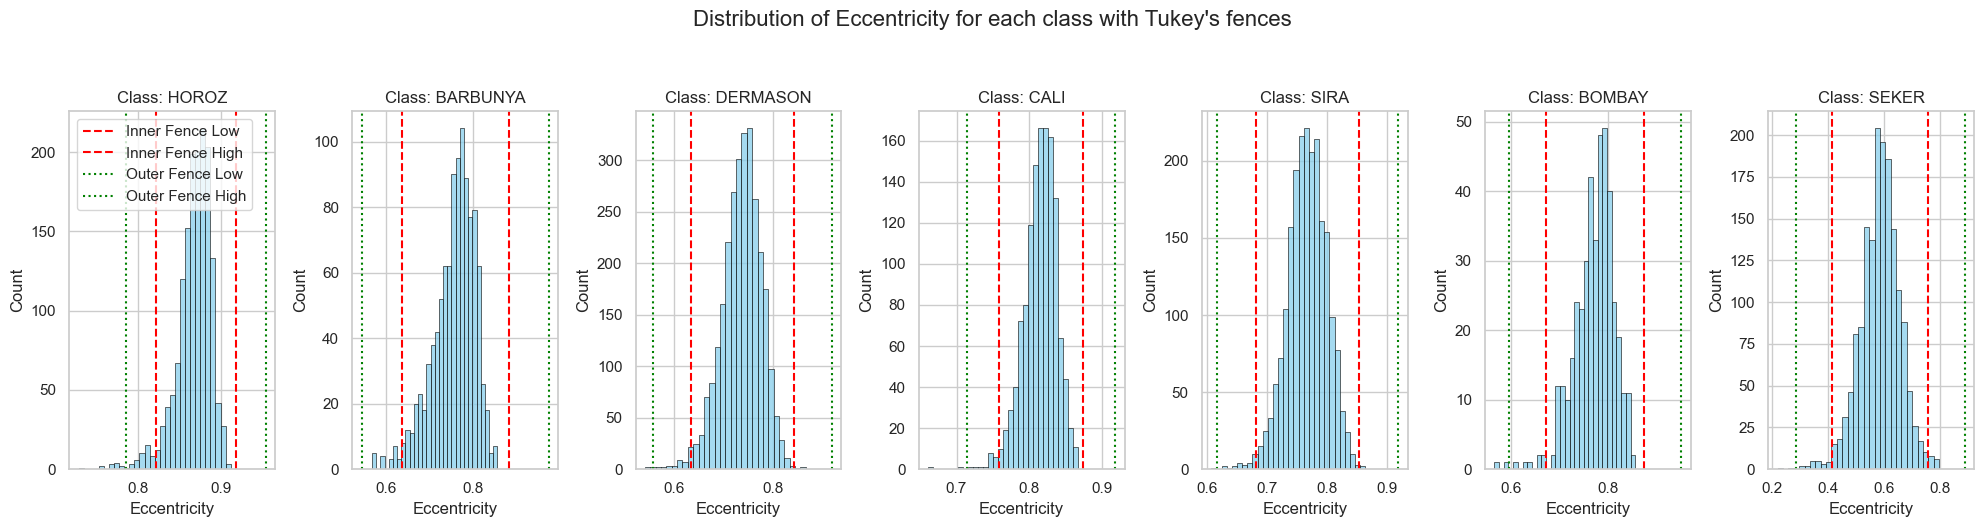

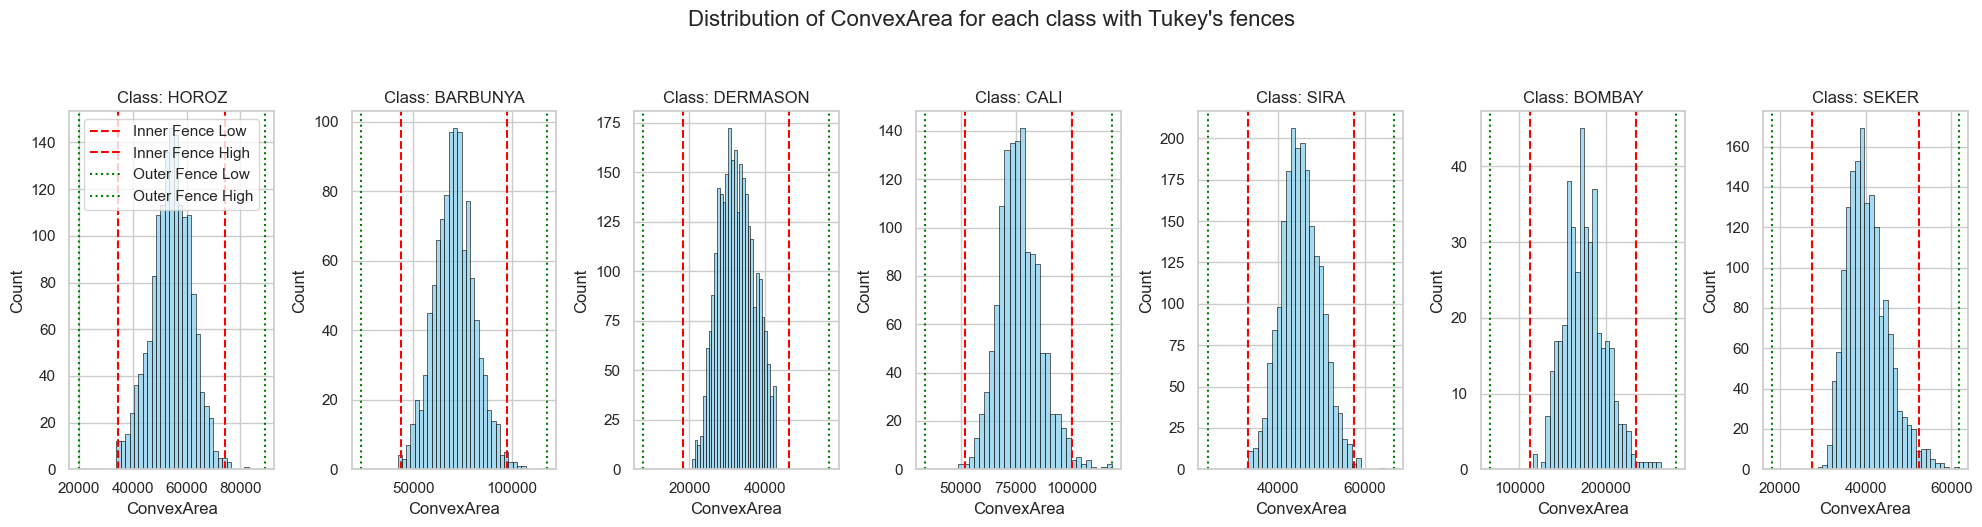

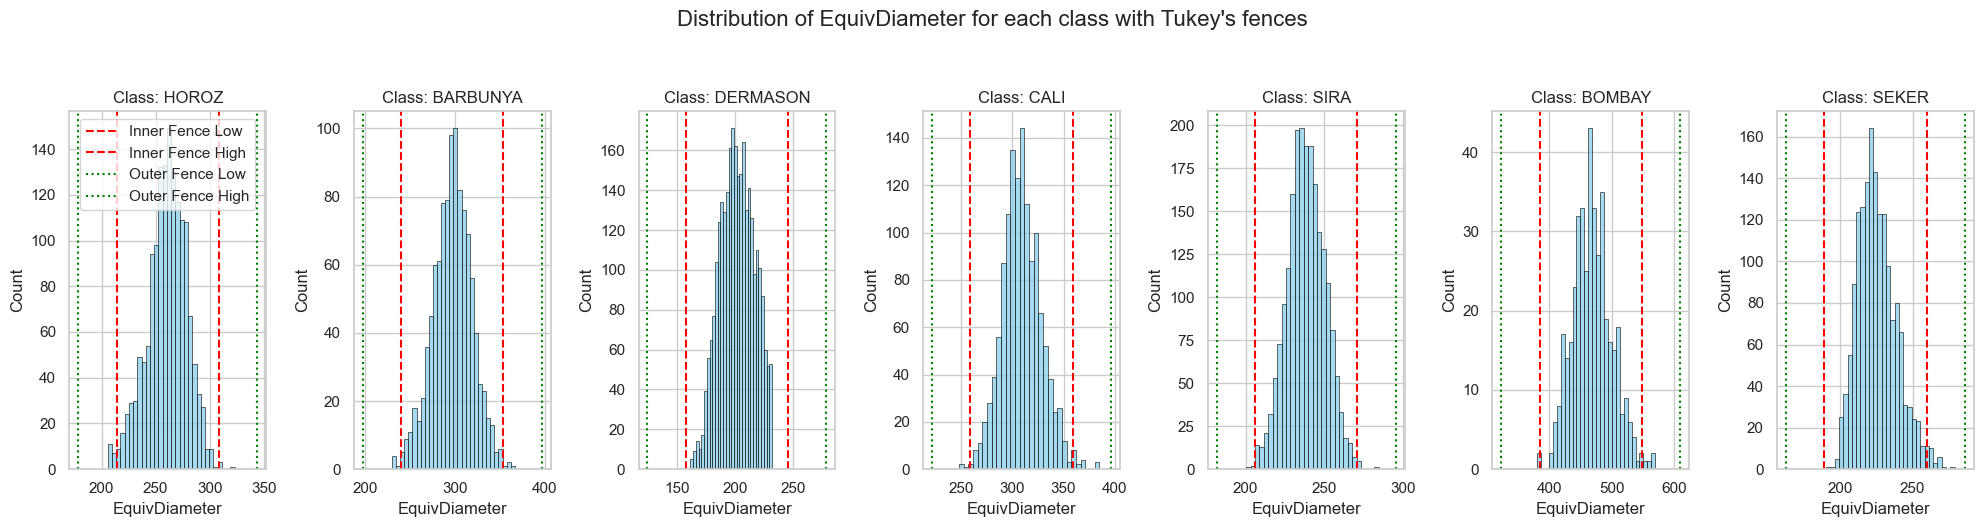

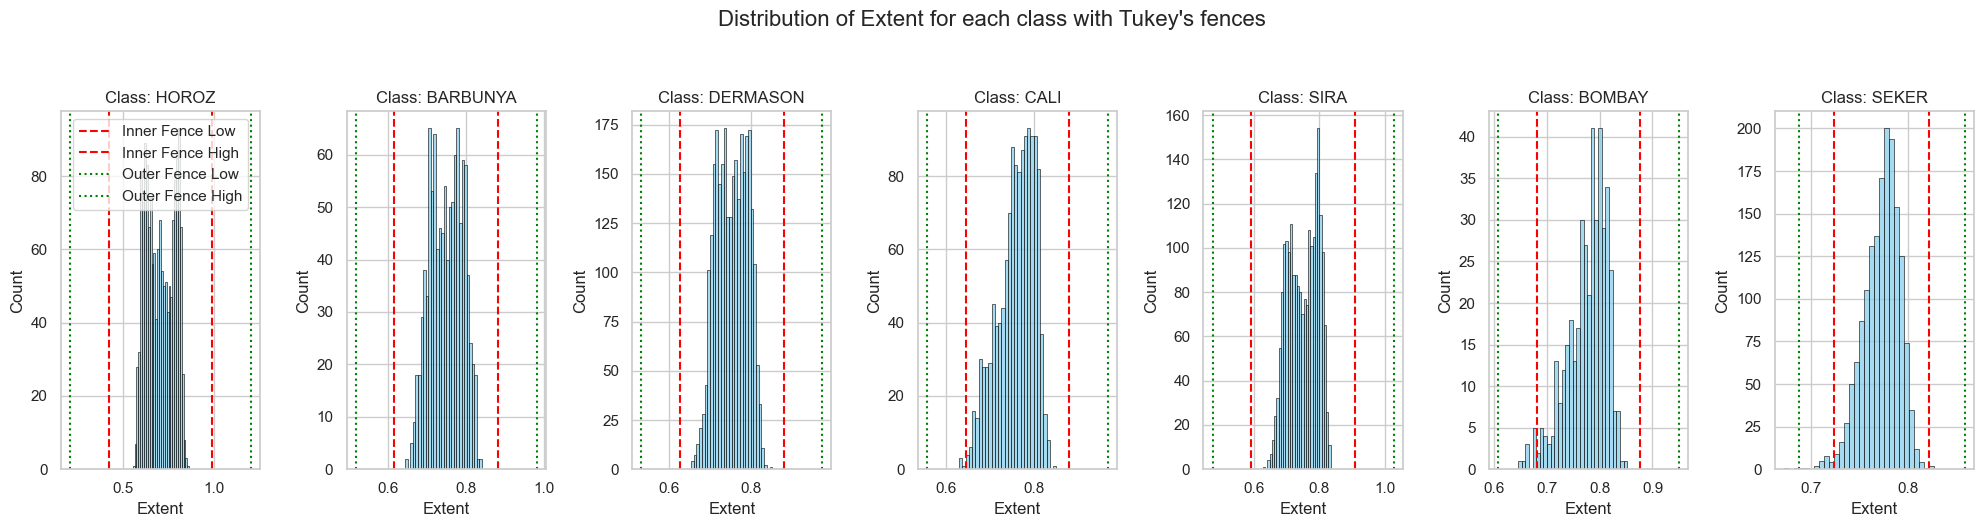

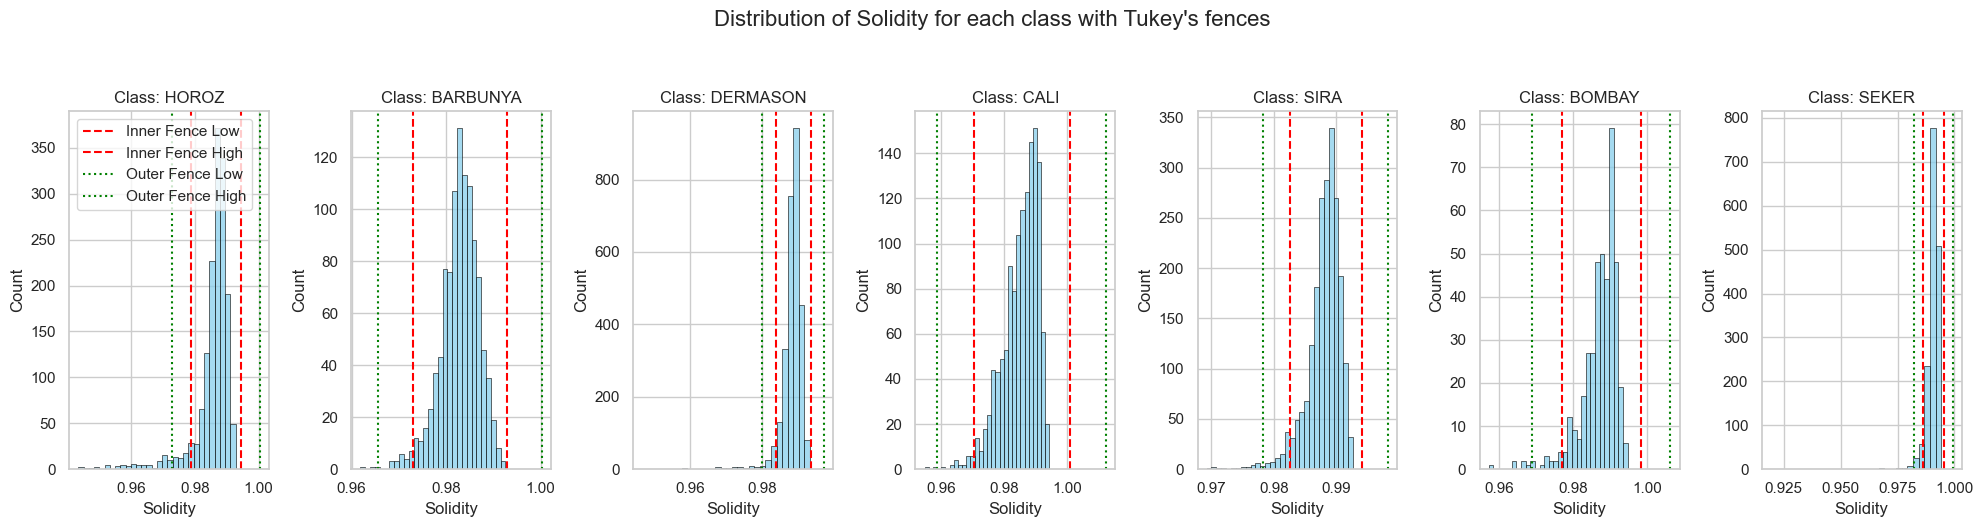

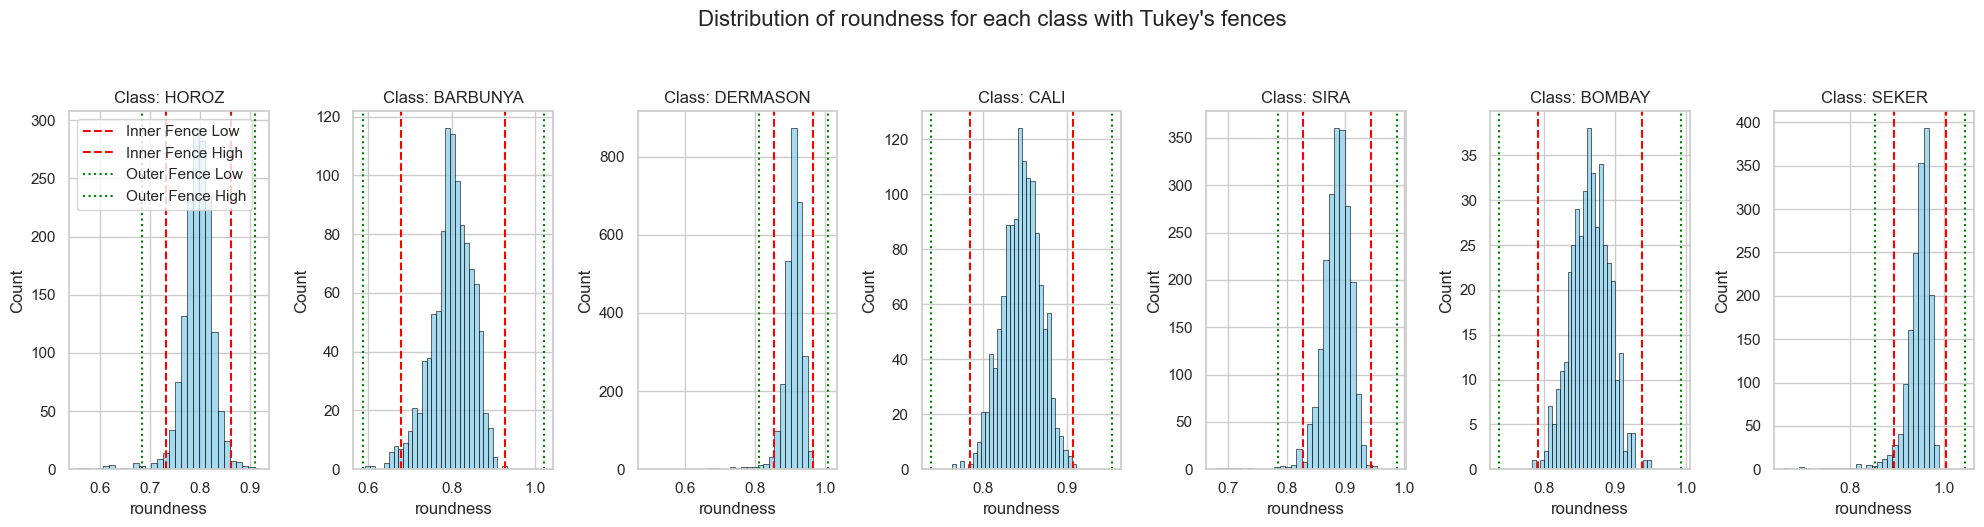

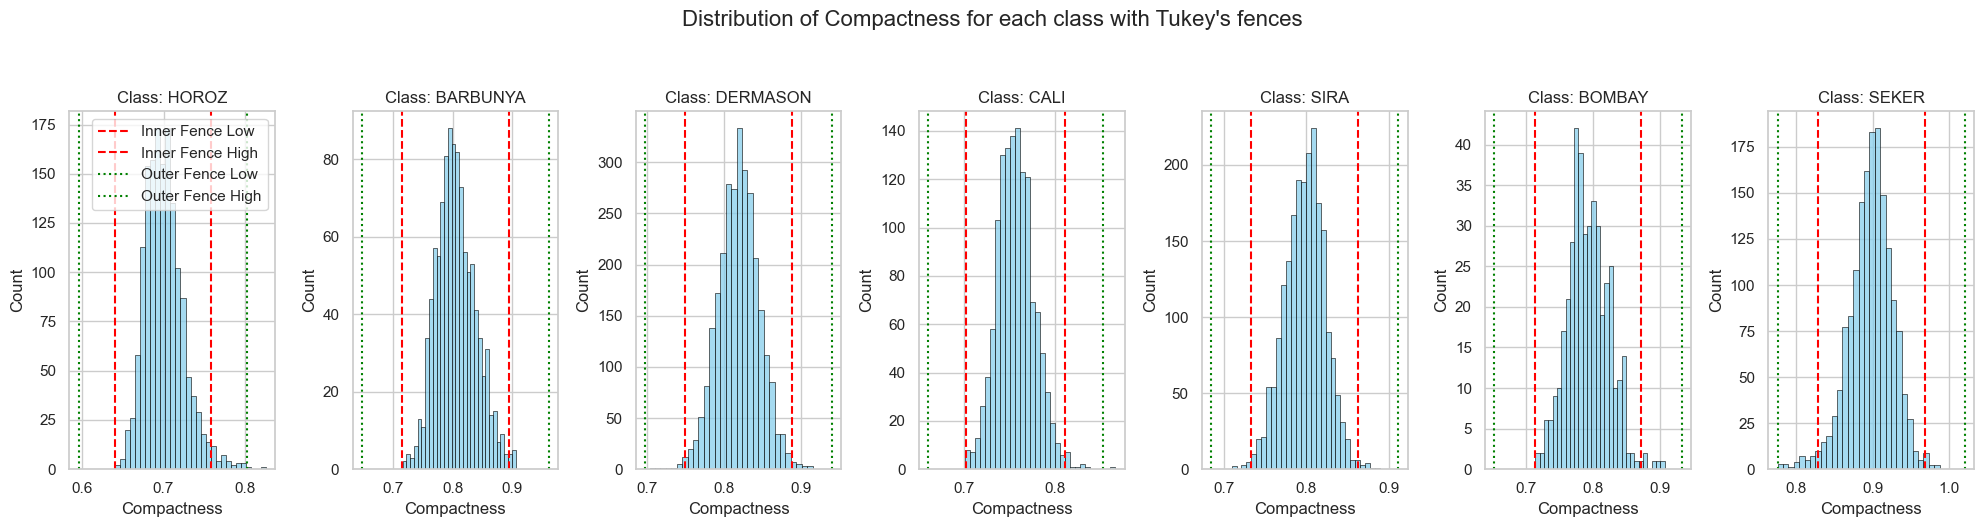

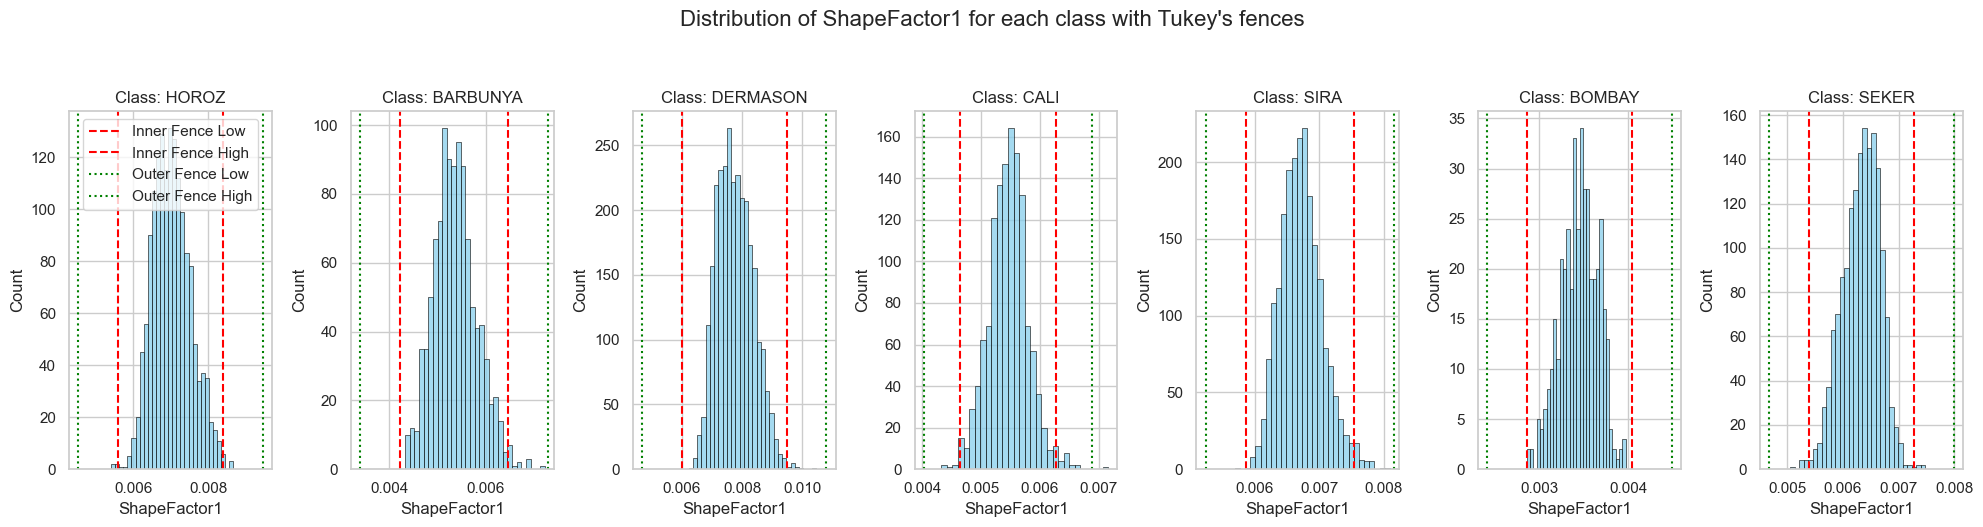

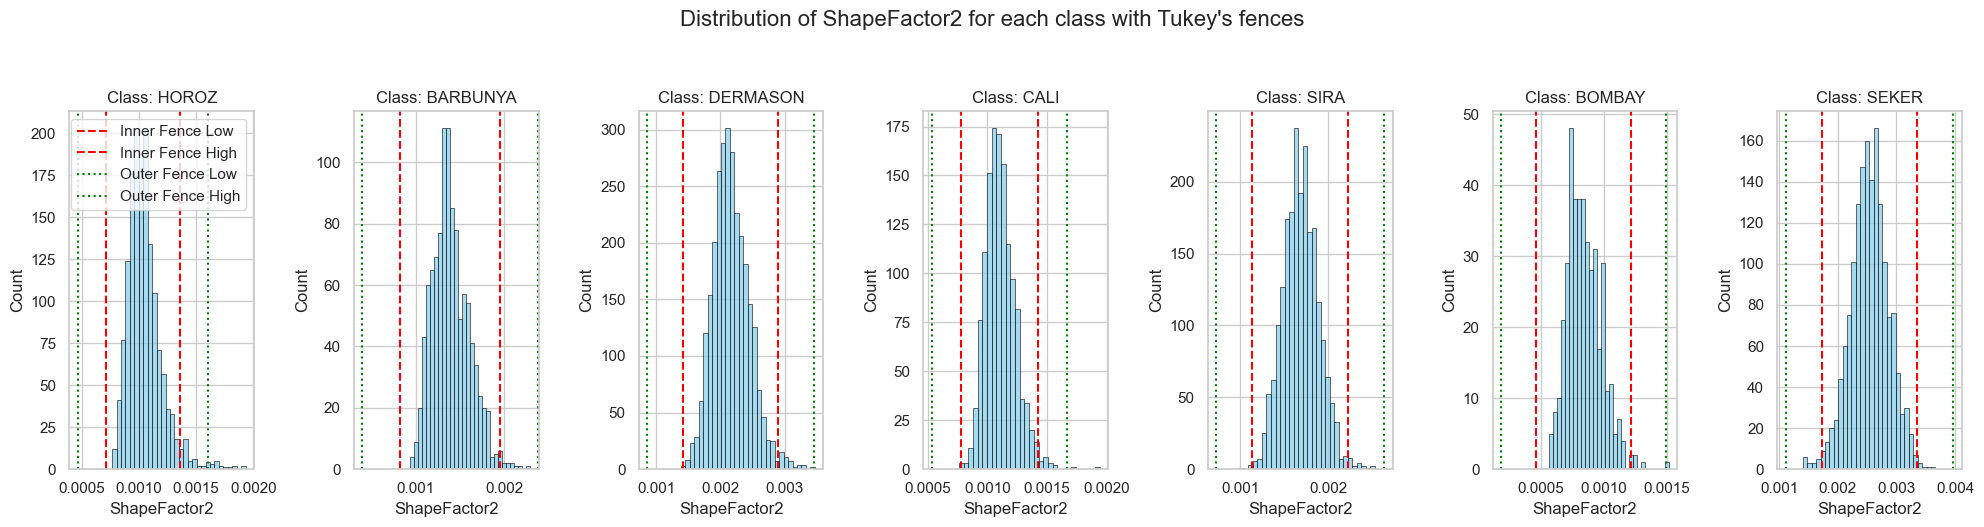

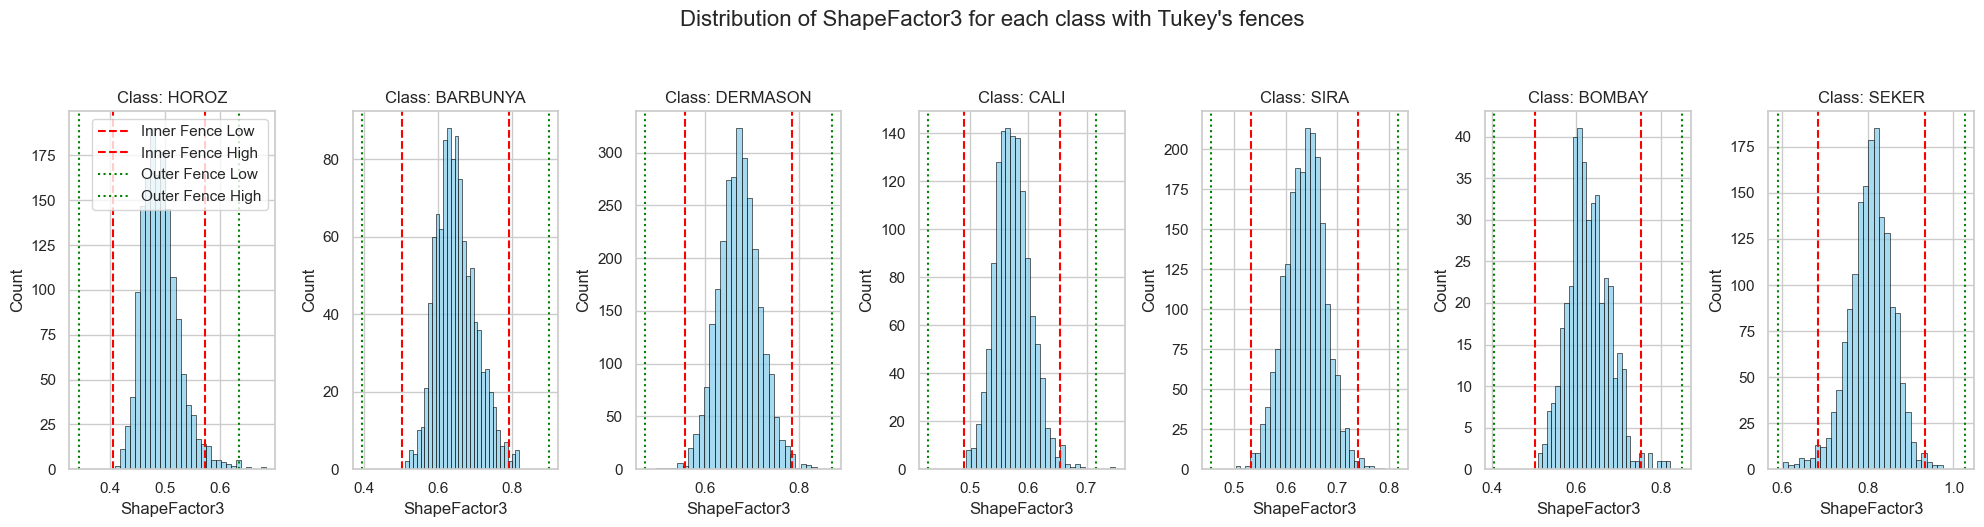

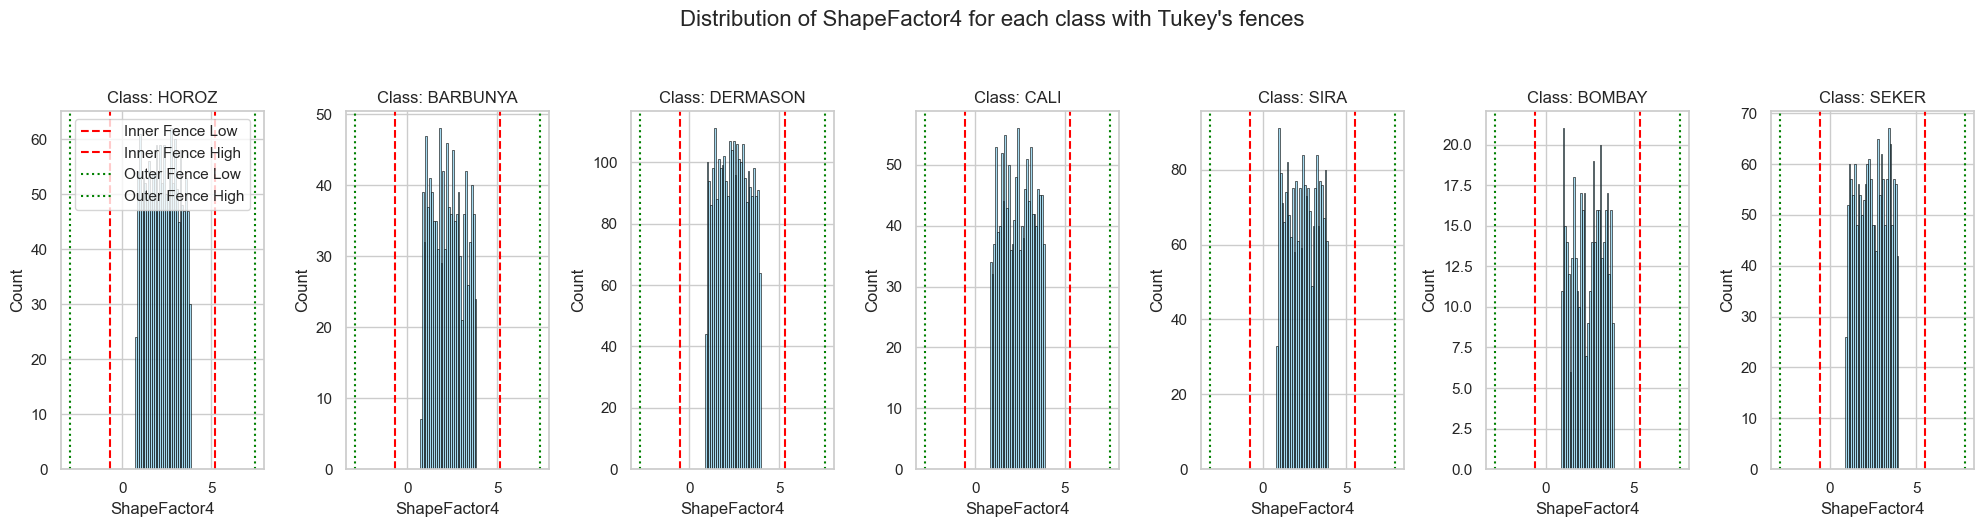

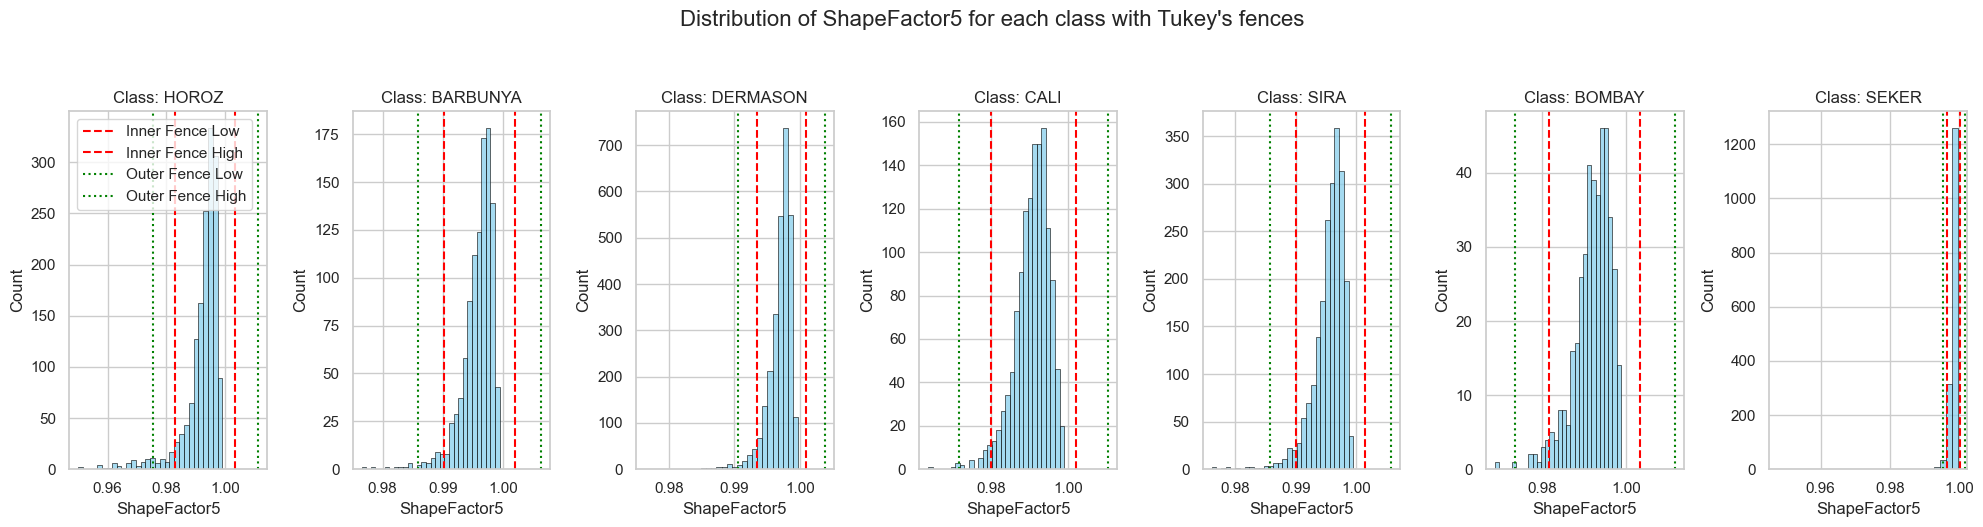

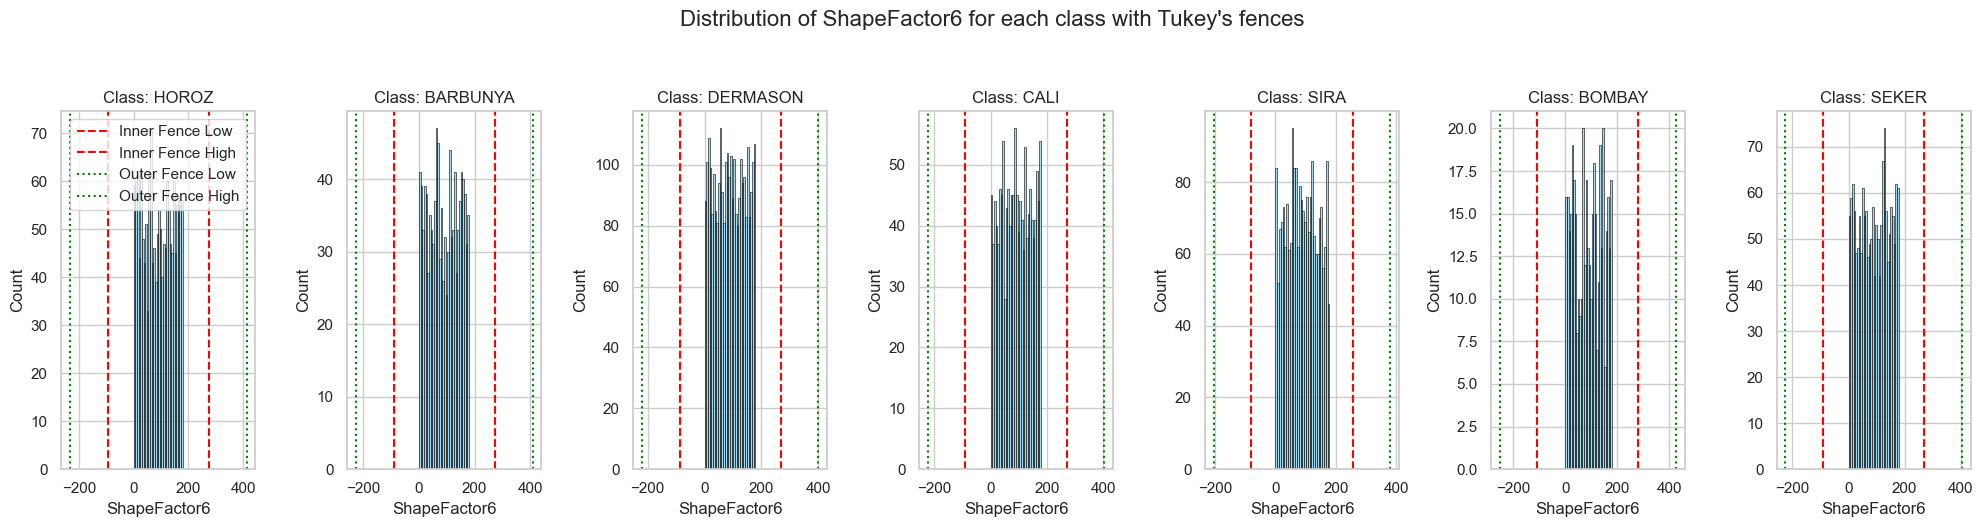

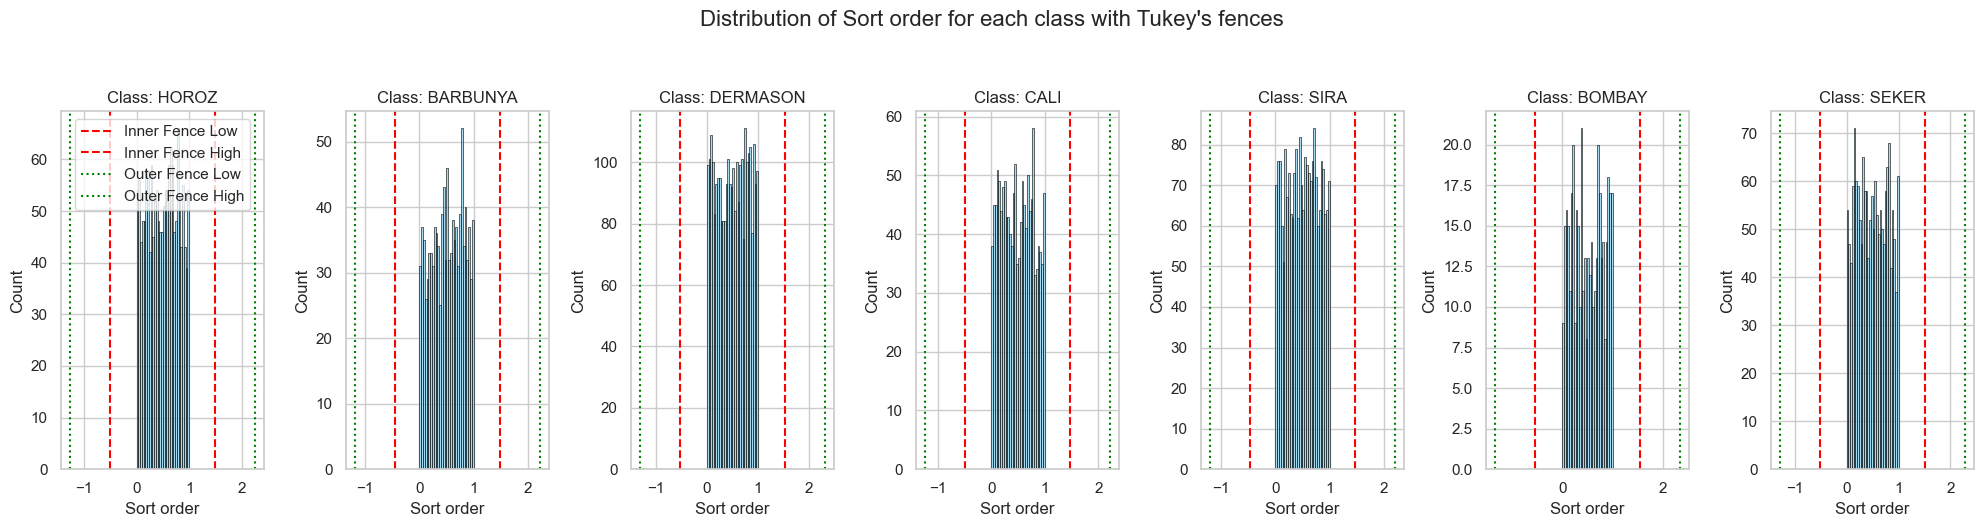

Number of outliers removed: 1303
Shape of original training data: (10875, 25)
Shape of training data after removing outliers: (9572, 25)


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Now perform outlier detection on the training set only
# Make a copy of the training set for outlier analysis
train_data = df_v6_Train.copy()

# Remove rows with any missing values
train_data.dropna(inplace=True)

numeric_features = list(train_data.select_dtypes(include=['int', 'float']).columns)

# Remove 'Constantness' from the list if it exists
if "Constantness" in numeric_features:
    numeric_features.remove("Constantness")

# Unique classes
unique_classes = train_data['Class'].unique()

# Initialize a set to record all global outlier indices
global_outlier_indices = set()

# Plotting and identifying outliers
for feature in numeric_features:
    plt.figure(figsize=(20, 5))
    plt.suptitle(f"Distribution of {feature} for each class with Tukey's fences", fontsize=16, y=1.05)

    for i, cls in enumerate(unique_classes):
        # Filter data for the current class
        class_data = train_data[train_data['Class'] == cls][feature]

        # Calculate Tukey's fences
        Q1 = class_data.quantile(0.25)
        Q3 = class_data.quantile(0.75)
        IQR = Q3 - Q1
        inner_fence_low = Q1 - 1.5 * IQR
        inner_fence_high = Q3 + 1.5 * IQR
        outer_fence_low = Q1 - 3 * IQR
        outer_fence_high = Q3 + 3 * IQR

        # Identify outliers based on outer fences
        outliers = class_data[(class_data < inner_fence_low) | (class_data > inner_fence_high)]
        global_outlier_indices.update(outliers.index)

        # Plot histogram and Tukey's fences
        plt.subplot(1, len(unique_classes), i + 1)
        sns.histplot(class_data, kde=False, bins=30, color='skyblue', edgecolor='black')
        plt.axvline(inner_fence_low, color='red', linestyle='--', label='Inner Fence Low' if i == 0 else "")
        plt.axvline(inner_fence_high, color='red', linestyle='--', label='Inner Fence High' if i == 0 else "")
        plt.axvline(outer_fence_low, color='green', linestyle=':', label='Outer Fence Low' if i == 0 else "")
        plt.axvline(outer_fence_high, color='green', linestyle=':', label='Outer Fence High' if i == 0 else "")
        plt.title(f'Class: {cls}')
        plt.xlabel(feature)
        plt.ylabel('Count')

        if i == 0:
            plt.legend()

    plt.tight_layout()
    plt.show()

# Remove global outliers from the training set and corresponding labels
df_v6_Train_outrem = train_data.drop(index=global_outlier_indices)
y_train_outrem = y_train.drop(index=global_outlier_indices)

print(f"Number of outliers removed: {len(global_outlier_indices)}")
print(f"Shape of original training data: {train_data.shape}")
print(f"Shape of training data after removing outliers: {df_v6_Train_outrem.shape}")

# df_v6_Train remains unchanged, df_v6_Train_outrem and y_train_outrem have outliers removed


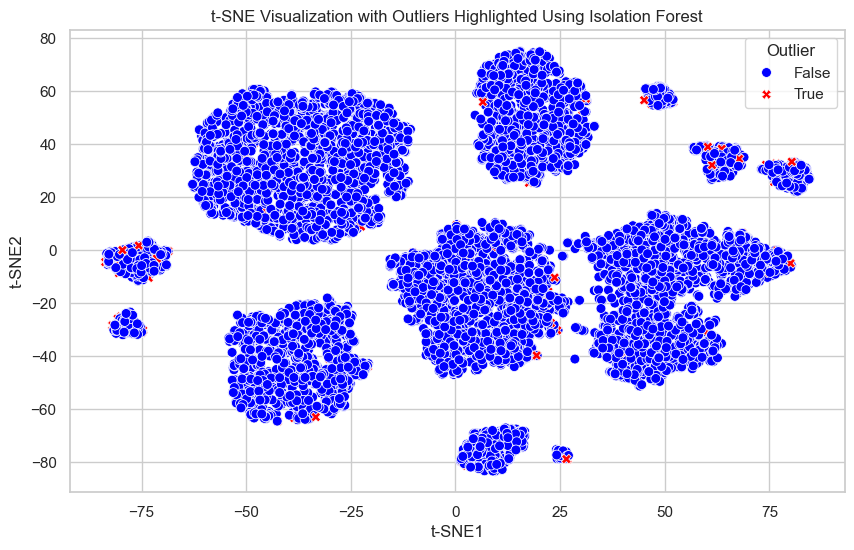

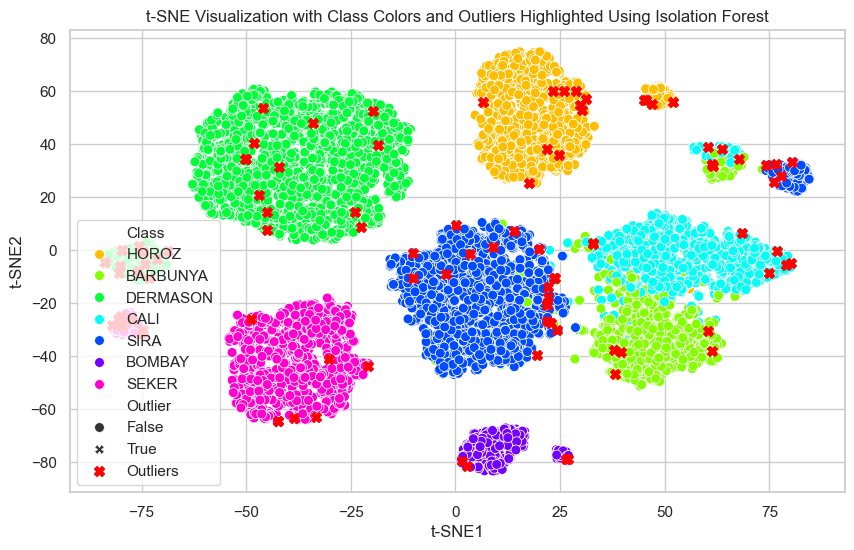

Identified Outliers:
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
1077   66178   1002.393       394.514047       216.169966      1.825018   
2304   40390    729.154       258.937013       199.153179      1.300190   
8066   81544   1086.127       370.854885       282.301102      1.313686   
4601   51737    838.558       294.547235       224.105394      1.314325   
3172   25757    604.185       237.544120       138.201631      1.718823   
...      ...        ...              ...              ...           ...   
7077   41353    757.504       292.794015       180.094738      1.625778   
9452   50459    834.999       286.901135       224.464239      1.278160   
6638   44660    789.111       281.059078       204.278981      1.375859   
6092   37039    747.615       301.801952       156.982018      1.922526   
13166  55135    901.067       350.803438       201.629609      1.739841   

       Eccentricity  ConvexArea  Constantness  EquivDiameter    Extent  ...  \

In [118]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy df_v6 to perform outlier analysis
mvo = df_v6_Train_outrem.copy()

# Exclude 'Class' and use all other features
exclude_features = ['Class']
numeric_features = [col for col in mvo.columns if col not in exclude_features]

# Standardize the data for outlier detection
scaler = StandardScaler()
mvo_scaled = pd.DataFrame(scaler.fit_transform(mvo[numeric_features]), columns=numeric_features, index=mvo.index)

# Initialize an empty DataFrame to store outlier flags
outlier_flags = pd.Series(False, index=mvo.index)

# Iterate over each class
for cls in mvo['Class'].unique():
    # Get data for the current class
    class_data = mvo[mvo['Class'] == cls]
    class_data_scaled = mvo_scaled.loc[class_data.index]  # Align indices with .loc
    
    # Fit Isolation Forest
    iso_forest = IsolationForest(random_state=42, contamination=0.01)
    outlier_pred = iso_forest.fit_predict(class_data_scaled)
    
    # Mark outliers (outlier_pred == -1)
    outlier_flags.loc[class_data.index] = outlier_pred == -1

# Add outlier flags to the DataFrame
mvo['Outlier'] = outlier_flags

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(mvo_scaled)

# Add t-SNE results to the DataFrame
mvo['t-SNE1'] = tsne_results[:, 0]
mvo['t-SNE2'] = tsne_results[:, 1]

# Plotting the t-SNE visualization with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mvo, x='t-SNE1', y='t-SNE2', hue='Outlier', palette={False: 'blue', True: 'red'}, style='Outlier', markers={False: 'o', True: 'X'}, s=50)
plt.title('t-SNE Visualization with Outliers Highlighted Using Isolation Forest')
plt.show()

# Create a t-SNE plot with color coding by 'Class' and outliers marked with red Xs
plt.figure(figsize=(10, 6))

# Using a color palette that excludes red to make class differences more pronounced
class_palette = sns.color_palette('hsv', len(mvo['Class'].unique()))
sns.scatterplot(
    data=mvo, x='t-SNE1', y='t-SNE2', 
    hue='Class', palette=class_palette, 
    style='Outlier', markers={False: 'o', True: 'X'}, s=50, 
    legend='full'
)

# Highlighting outliers with red 'X's
outliers = mvo[mvo['Outlier']]
plt.scatter(outliers['t-SNE1'], outliers['t-SNE2'], color='red', marker='X', s=50, label='Outliers')

plt.title('t-SNE Visualization with Class Colors and Outliers Highlighted Using Isolation Forest')
plt.legend()
plt.show()

# Output DataFrame with identified outliers
print("Identified Outliers:")
print(mvo[mvo['Outlier']])


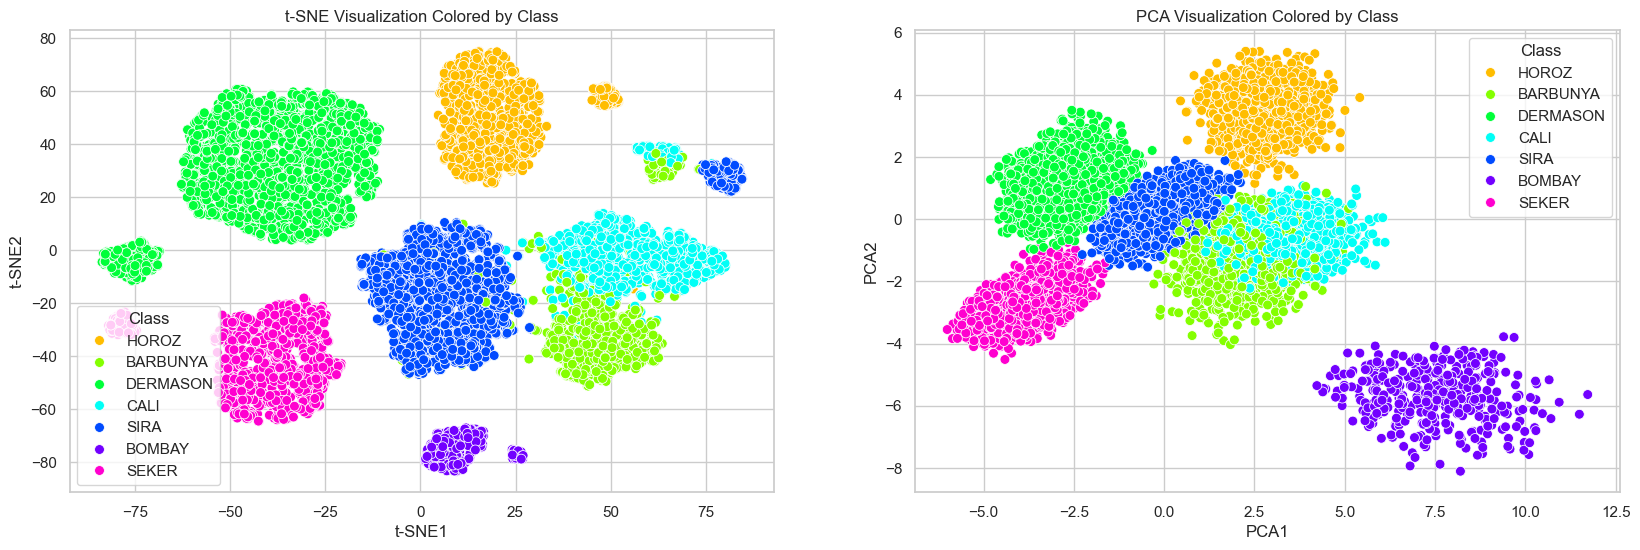

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy df_v6 to perform analysis
mvo = df_v6_Train_outrem.copy()

# Exclude 'Class' column and use all other numeric features
exclude_features = ['Class']
numeric_features = [col for col in mvo.columns if col not in exclude_features]

# Standardize the data
scaler = StandardScaler()
mvo_scaled = pd.DataFrame(scaler.fit_transform(mvo[numeric_features]), columns=numeric_features)

# Apply t-SNE to the entire dataset
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(mvo_scaled)

# Add t-SNE results to the DataFrame
mvo['t-SNE1'] = tsne_results[:, 0]
mvo['t-SNE2'] = tsne_results[:, 1]

# Apply PCA to the entire dataset
pca = PCA(n_components=2)
pca_results = pca.fit_transform(mvo_scaled)

# Add PCA results to the DataFrame
mvo['PCA1'] = pca_results[:, 0]
mvo['PCA2'] = pca_results[:, 1]

# Set up the subplots for side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# t-SNE plot colored by 'Class'
class_palette = sns.color_palette('hsv', len(mvo['Class'].unique()))
sns.scatterplot(
    data=mvo, x='t-SNE1', y='t-SNE2', 
    hue='Class', palette=class_palette, 
    s=50, legend='full', ax=axes[0]
)
axes[0].set_title('t-SNE Visualization Colored by Class')

# PCA plot colored by 'Class'
sns.scatterplot(
    data=mvo, x='PCA1', y='PCA2', 
    hue='Class', palette=class_palette, 
    s=50, legend='full', ax=axes[1]
)
axes[1].set_title('PCA Visualization Colored by Class')

# Show the plots
plt.show()


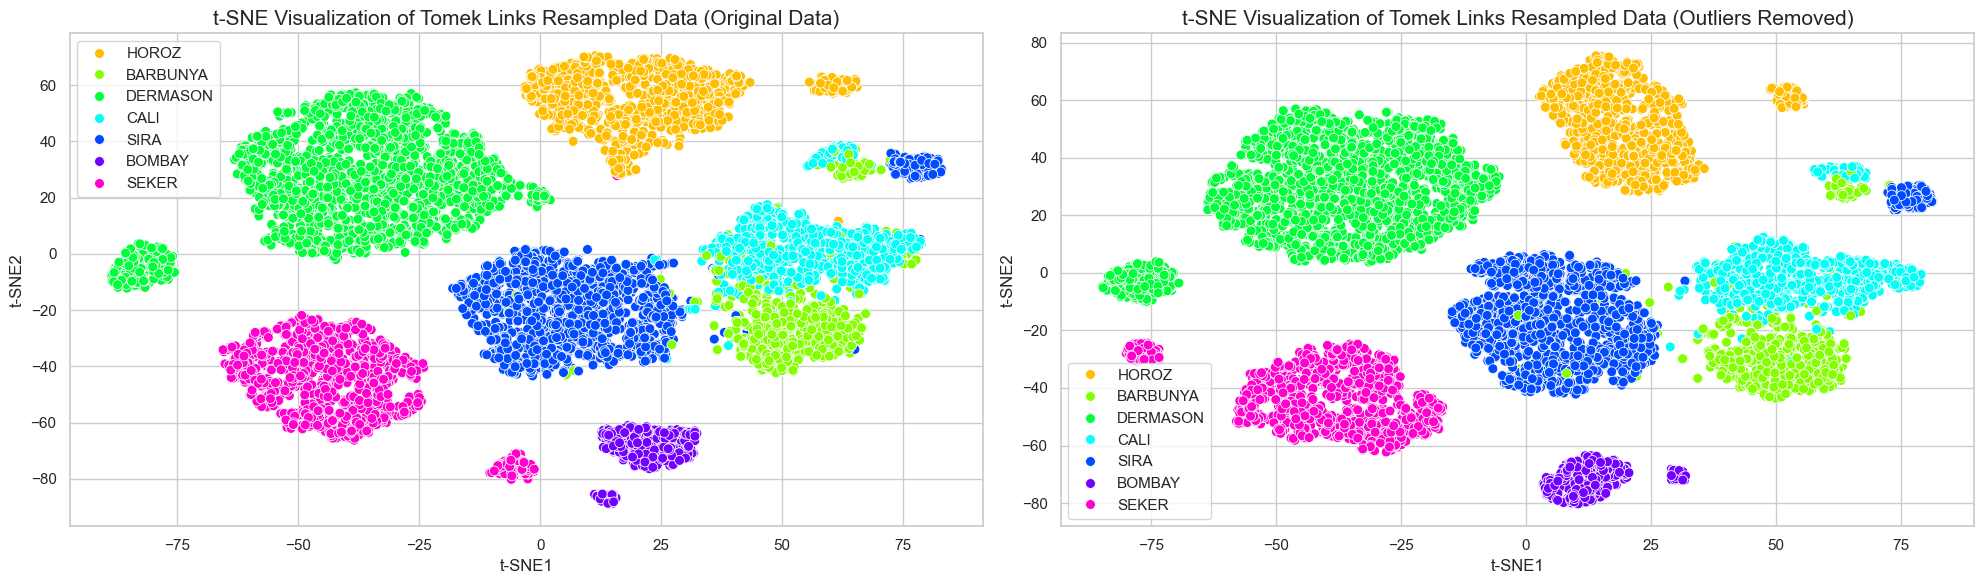

In [104]:
from imblearn.under_sampling import TomekLinks

def process_tomek_tsne(df):
    # Define the features and target
    features = df.drop(columns=['Class'])
    target = df['Class']
    
    # Apply Tomek links for undersampling
    tl = TomekLinks()
    X_resampled, y_resampled = tl.fit_resample(features, target)
    
    # Combine the resampled features and target into a new DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=features.columns)
    df_resampled['Class'] = y_resampled
    
    # Standardize the data before applying t-SNE
    scaler = StandardScaler()
    df_resampled_scaled = scaler.fit_transform(df_resampled.drop(columns=['Class']))
    
    # Apply t-SNE to the resampled dataset
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(df_resampled_scaled)
    
    # Add t-SNE results to the DataFrame
    df_resampled['t-SNE1'] = tsne_results[:, 0]
    df_resampled['t-SNE2'] = tsne_results[:, 1]
    
    return df_resampled

# Process both datasets
df_v6_resampled = process_tomek_tsne(df_v6_Train.copy())
df_v6_outrem_resampled = process_tomek_tsne(df_v6_Train_outrem.copy())

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot t-SNE visualization for original data after Tomek Links
sns.scatterplot(
    data=df_v6_resampled, x='t-SNE1', y='t-SNE2',
    hue='Class', palette=sns.color_palette('hsv', len(df_v6_resampled['Class'].unique())),
    s=50, legend='full', ax=axes[0]
)
axes[0].set_title('t-SNE Visualization of Tomek Links Resampled Data (Original Data)', fontsize=15)
axes[0].legend(loc='best')

# Plot t-SNE visualization for data with outliers removed after Tomek Links
sns.scatterplot(
    data=df_v6_outrem_resampled, x='t-SNE1', y='t-SNE2',
    hue='Class', palette=sns.color_palette('hsv', len(df_v6_outrem_resampled['Class'].unique())),
    s=50, legend='full', ax=axes[1]
)
axes[1].set_title('t-SNE Visualization of Tomek Links Resampled Data (Outliers Removed)', fontsize=15)
axes[1].legend(loc='best')

# Display plots
plt.tight_layout()
plt.show()

In [105]:
print(df_v6_Train_outrem.columns)


Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness',
       'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness',
       'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4',
       'ShapeFactor5', 'ShapeFactor6', 'Sort order', 'Colour_0', 'Colour_1',
       'Colour_2', 'Colour_3', 'Class'],
      dtype='object')


Fitting 5 folds for each of 196 candidates, totalling 980 fits
Best Parameters: {'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


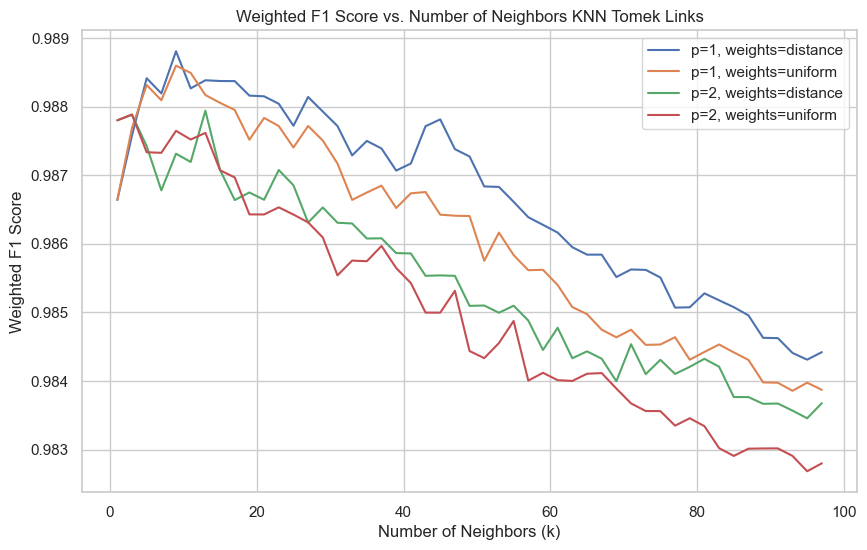


5-Fold Cross-Validation Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       263
           1       1.00      1.00      1.00       104
           2       0.92      0.95      0.93       326
           3       1.00      1.00      1.00       709
           4       1.00      0.99      0.99       385
           5       1.00      1.00      1.00       405
           6       0.96      1.00      0.98       527

    accuracy                           0.98      2719
   macro avg       0.98      0.97      0.97      2719
weighted avg       0.98      0.98      0.98      2719



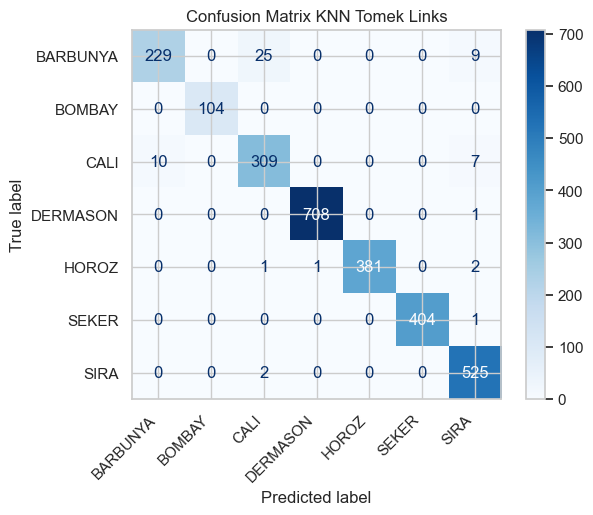

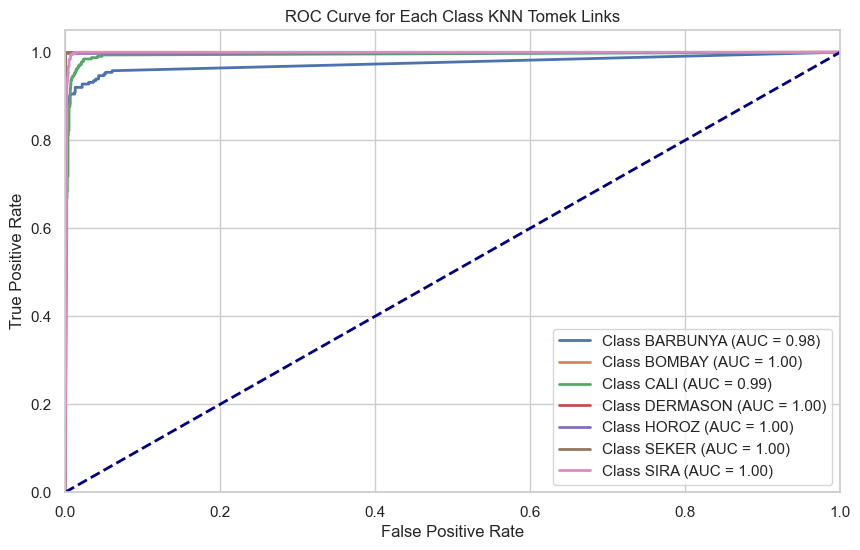

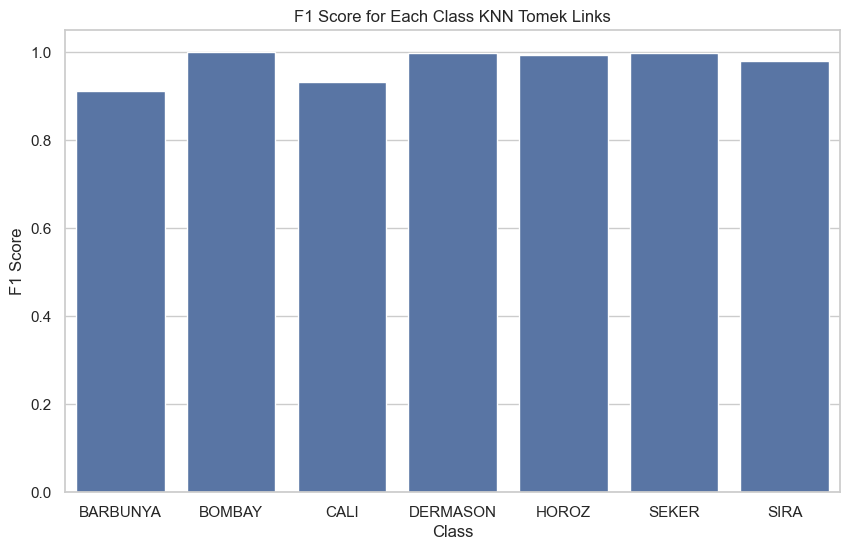

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Assume df_v6_Train_outrem and y_train_outrem are your pre-processed training set and corresponding labels

# Step 1: Preprocessing and Resampling
# Scale the features
train = df_v6_Train_outrem.drop(columns="Class")

# Label encode the target variables
label_encoder = LabelEncoder()
y_train_outrem_encoded = label_encoder.fit_transform(y_train_outrem)
y_test_encoded = label_encoder.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train)

# Apply Tomek Links for undersampling
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X_train_scaled, y_train_outrem_encoded)

# Step 2: Grid Search with Cross-Validation
# Define the range for k and p
max_k = int(np.sqrt(len(X_resampled)))
k_values = list(range(1, max_k + 1, 2))  # Use odd k values to avoid ties

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': k_values,
    'p': [1, 2],  # Minkowski distance with p=1 (Manhattan), p=2 (Euclidean)
    'algorithm': ['brute'],
    'weights': ['distance', 'uniform']
}

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV with tqdm progress bar
grid_search = GridSearchCV(knn, param_grid, cv=kfold, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Plot weighted F1 score vs. number of neighbors (k)
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
for p in [1, 2]:
    for weight in ['distance', 'uniform']:
        subset = results[(results['param_p'] == p) & (results['param_weights'] == weight)]
        plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'p={p}, weights={weight}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score vs. Number of Neighbors KNN Tomek Links')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Evaluate on Test Set
# Scale the test data
X_test_scaled = scaler.transform(df_v6_Test.drop(columns="Class"))

# Perform 5-fold cross-validation on the test set using the best model
y_test_pred = cross_val_predict(best_model, X_test_scaled, y_test_encoded, cv=kfold)

# Print the classification report
print("\n5-Fold Cross-Validation Classification Report on Test Set:")
print(classification_report(y_test_encoded, y_test_pred))

# Step 4: Additional Analysis and Plots

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')  
plt.title("Confusion Matrix KNN Tomek Links")
plt.show()

# ROC Curve and AUC for each class
plt.figure(figsize=(10, 6))
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
y_test_pred_proba = cross_val_predict(best_model, X_test_scaled, y_test_encoded, cv=kfold, method='predict_proba')

for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class KNN Tomek Links')
plt.legend(loc="lower right")
plt.show()

# F1 Score Bar Plot
f1_scores = f1_score(y_test_encoded, y_test_pred, average=None)
plt.figure(figsize=(10, 6))
sns.barplot(x=label_encoder.classes_, y=f1_scores)
plt.title('F1 Score for Each Class KNN Tomek Links')
plt.ylabel('F1 Score')
plt.xlabel('Class')
plt.show()


Fitting 5 folds for each of 196 candidates, totalling 980 fits
Best Parameters: {'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


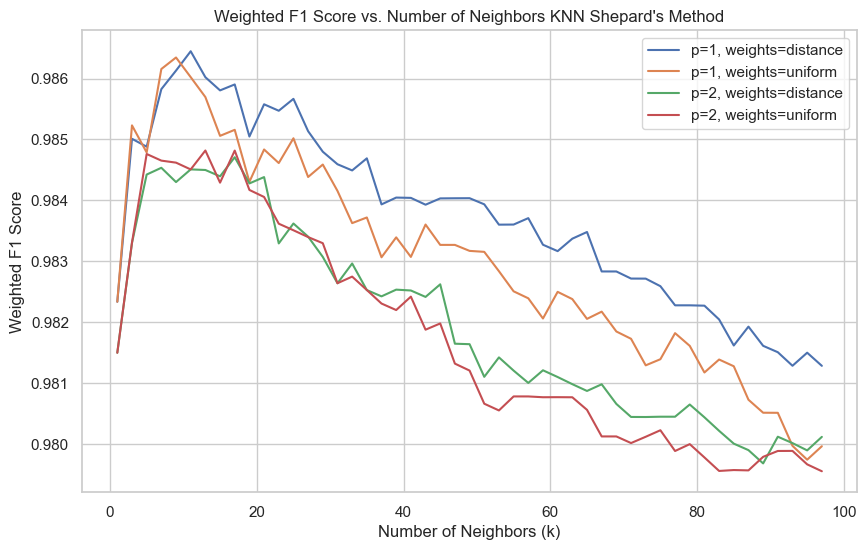


5-Fold Cross-Validation Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       263
           1       1.00      1.00      1.00       104
           2       0.91      0.96      0.93       326
           3       1.00      1.00      1.00       709
           4       1.00      0.99      0.99       385
           5       1.00      1.00      1.00       405
           6       0.96      1.00      0.98       527

    accuracy                           0.98      2719
   macro avg       0.98      0.97      0.97      2719
weighted avg       0.98      0.98      0.98      2719



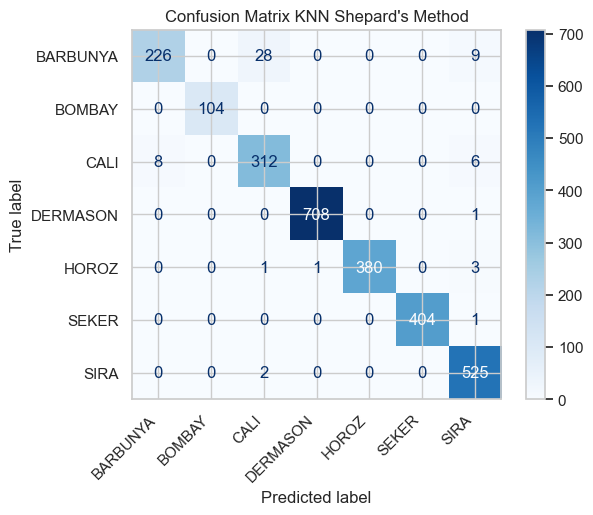

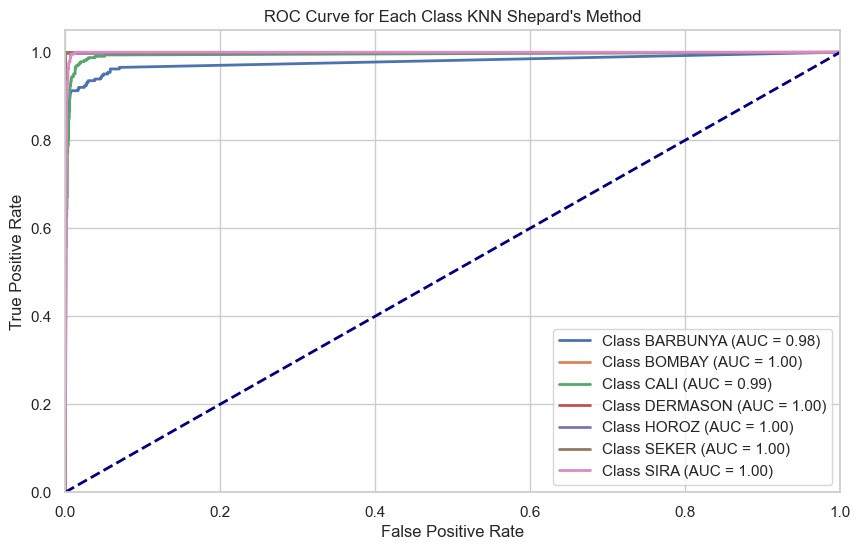

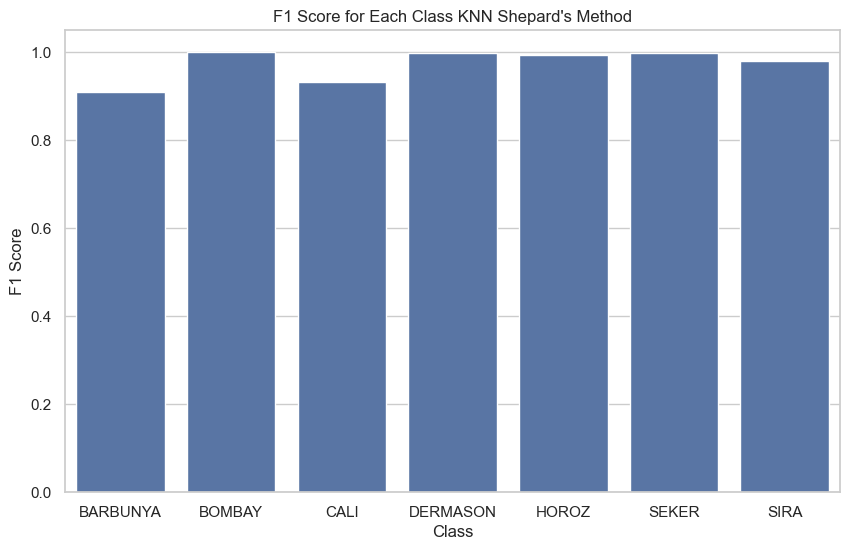

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Assume df_v6_Train_outrem and y_train_outrem are your pre-processed training set and corresponding labels

# Step 1: Preprocessing and Resampling
# Scale the features
train = df_v6_Train_outrem.drop(columns="Class")

# Label encode the target variables
label_encoder = LabelEncoder()
y_train_outrem_encoded = label_encoder.fit_transform(y_train_outrem)
y_test_encoded = label_encoder.transform(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train)

X_resampled, y_resampled = X_train_scaled, y_train_outrem_encoded

# Step 2: Grid Search with Cross-Validation
# Define the range for k and p
max_k = int(np.sqrt(len(X_resampled)))
k_values = list(range(1, max_k + 1, 2))  # Use odd k values to avoid ties

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': k_values,
    'p': [1, 2],  # Minkowski distance with p=1 (Manhattan), p=2 (Euclidean)
    'algorithm': ['brute'],
    'weights': ['distance', 'uniform']
}

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV with tqdm progress bar
grid_search = GridSearchCV(knn, param_grid, cv=kfold, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Plot weighted F1 score vs. number of neighbors (k)
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
for p in [1, 2]:
    for weight in ['distance', 'uniform']:
        subset = results[(results['param_p'] == p) & (results['param_weights'] == weight)]
        plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'p={p}, weights={weight}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score vs. Number of Neighbors KNN Shepard\'s Method')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Evaluate on Test Set
# Scale the test data
X_test_scaled = scaler.transform(df_v6_Test.drop(columns="Class"))

# Perform 5-fold cross-validation on the test set using the best model
y_test_pred = cross_val_predict(best_model, X_test_scaled, y_test_encoded, cv=kfold)

# Print the classification report
print("\n5-Fold Cross-Validation Classification Report on Test Set:")
print(classification_report(y_test_encoded, y_test_pred))

# Step 4: Additional Analysis and Plots

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')  
plt.title("Confusion Matrix KNN Shepard's Method")
plt.show()

# ROC Curve and AUC for each class
plt.figure(figsize=(10, 6))
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
y_test_pred_proba = cross_val_predict(best_model, X_test_scaled, y_test_encoded, cv=kfold, method='predict_proba')

for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class KNN Shepard\'s Method')
plt.legend(loc="lower right")
plt.show()

# F1 Score Bar Plot
f1_scores = f1_score(y_test_encoded, y_test_pred, average=None)
plt.figure(figsize=(10, 6))
sns.barplot(x=label_encoder.classes_, y=f1_scores)
plt.title('F1 Score for Each Class KNN Shepard\'s Method')
plt.ylabel('F1 Score')
plt.xlabel('Class')
plt.show()


#### DT

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}

5-Fold Cross-Validation Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       263
           1       0.99      1.00      1.00       104
           2       0.93      0.88      0.90       326
           3       1.00      1.00      1.00       709
           4       1.00      1.00      1.00       385
           5       1.00      1.00      1.00       405
           6       0.98      0.97      0.98       527

    accuracy                           0.97      2719
   macro avg       0.96      0.97      0.96      2719
weighted avg       0.97      0.97      0.97      2719



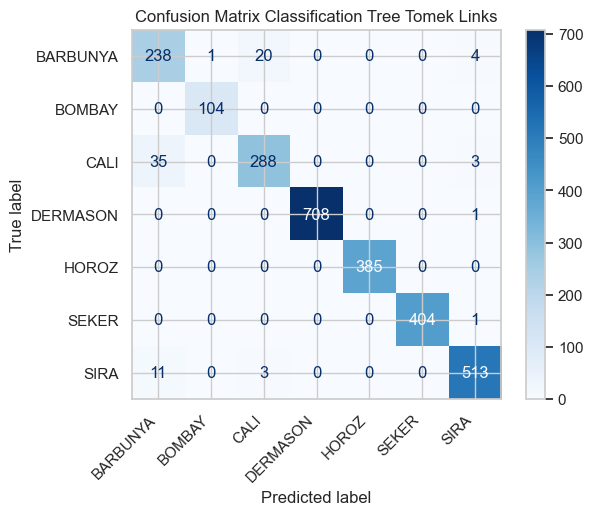

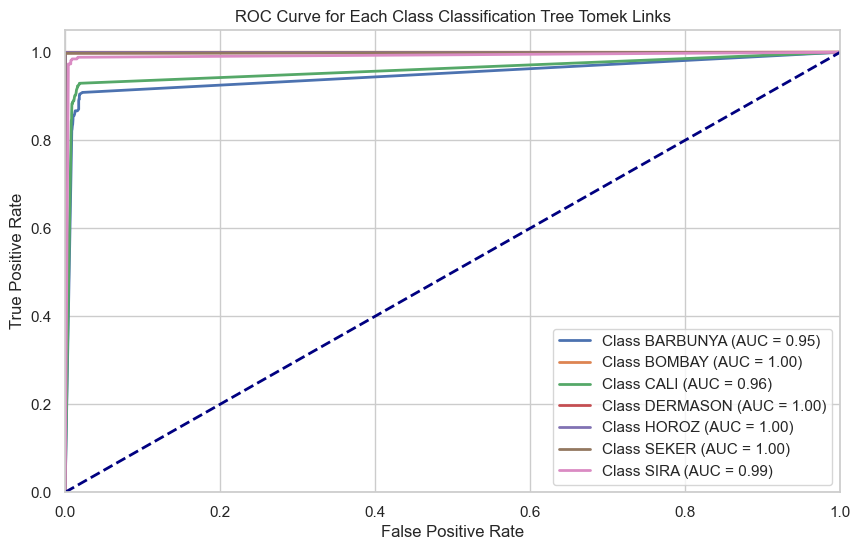

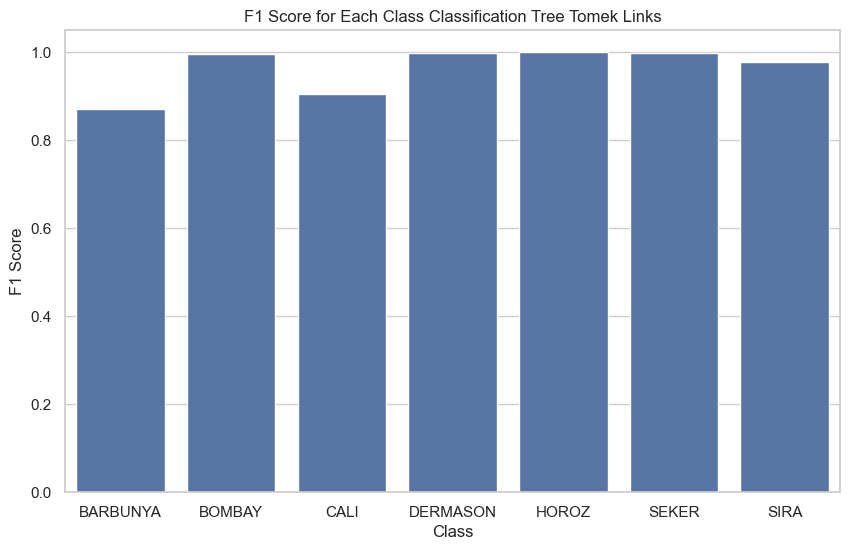

In [126]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import TomekLinks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Assume df_v6_Train_outrem and y_train_outrem are your pre-processed training set and corresponding labels

# Step 1: Preprocessing and Resampling
# Separate features and target variable from the training set
train = df_v6_Train_outrem.drop(columns="Class")

# Label encode the target variables
label_encoder = LabelEncoder()
y_train_outrem_encoded = label_encoder.fit_transform(y_train_outrem)
y_test_encoded = label_encoder.transform(y_test)

# Apply Tomek Links for undersampling
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(train, y_train_outrem_encoded)

# Step 2: Hyperparameter Tuning with Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],  # 'gini' or 'entropy' for impurity measure
    'max_depth': [None, 20, 30], 
    'min_samples_split': [2, 10, 20],  
    'min_samples_leaf': [1, 5, 10],  
    'splitter': ['best', 'random'],  
    'class_weight': [None, 'balanced'],  
}

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV with tqdm progress bar
grid_search = GridSearchCV(dtree, param_grid, cv=kfold, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Get the best model from grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Step 3: Evaluate on Test Set
# No scaling required for Decision Tree
X_test = df_v6_Test.drop(columns="Class")

# Perform 5-fold cross-validation on the test set using the best model
y_test_pred = cross_val_predict(best_model, X_test, y_test_encoded, cv=kfold)

# Print the classification report
print("\n5-Fold Cross-Validation Classification Report on Test Set:")
print(classification_report(y_test_encoded, y_test_pred))

# Step 4: Additional Analysis and Plots

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=45, ha='right')  

plt.title("Confusion Matrix Classification Tree Tomek Links")
plt.show()

# ROC Curve and AUC for each class
plt.figure(figsize=(10, 6))
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
y_test_pred_proba = cross_val_predict(best_model, X_test, y_test_encoded, cv=kfold, method='predict_proba')

for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class Classification Tree Tomek Links')
plt.legend(loc="lower right")
plt.show()

# F1 Score Bar Plot
f1_scores = f1_score(y_test_encoded, y_test_pred, average=None)
plt.figure(figsize=(10, 6))
sns.barplot(x=label_encoder.classes_, y=f1_scores)
plt.title('F1 Score for Each Class Classification Tree Tomek Links')
plt.ylabel('F1 Score')
plt.xlabel('Class')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}

5-Fold Cross-Validation Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       263
           1       0.99      1.00      1.00       104
           2       0.93      0.88      0.90       326
           3       1.00      1.00      1.00       709
           4       0.99      1.00      1.00       385
           5       1.00      0.99      1.00       405
           6       0.97      0.97      0.97       527

    accuracy                           0.97      2719
   macro avg       0.96      0.96      0.96      2719
weighted avg       0.97      0.97      0.97      2719



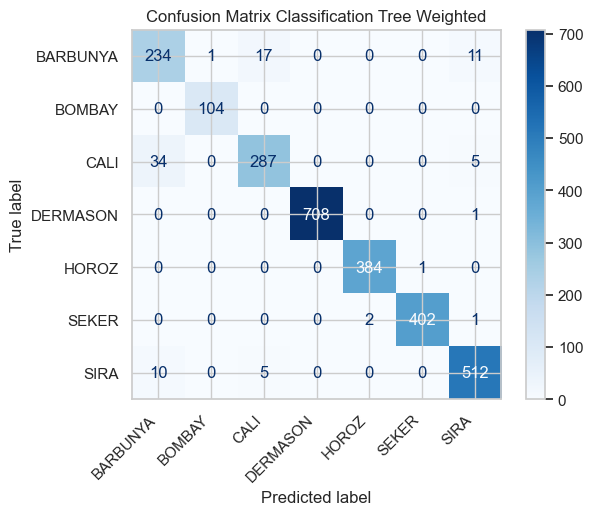

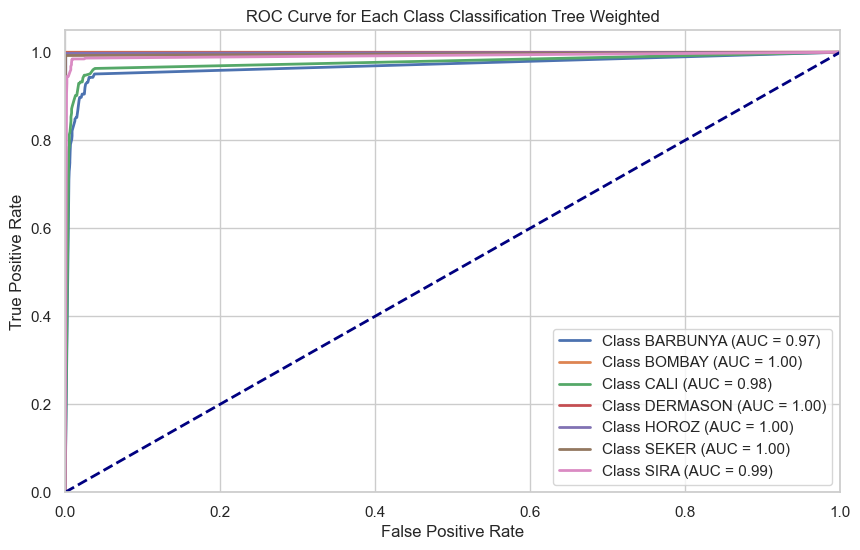

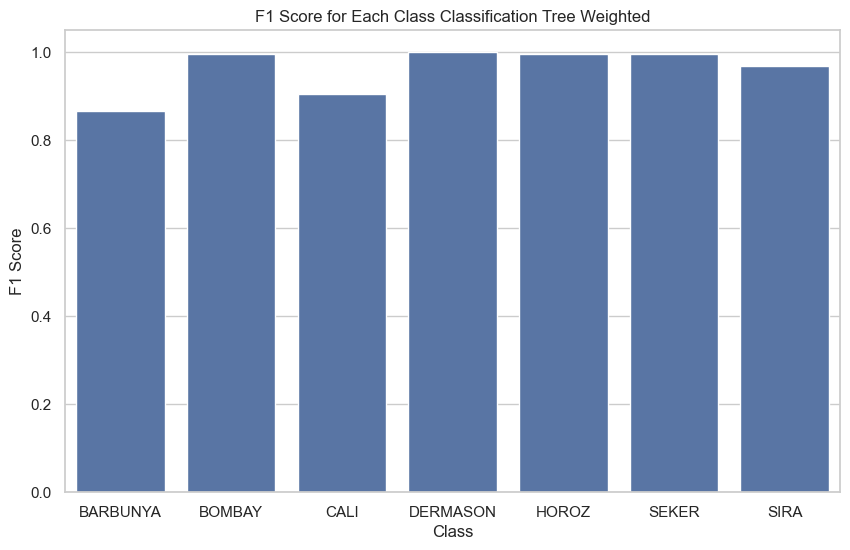

In [127]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


train = df_v6_Train_outrem.drop(columns="Class")

# Label encode the target variables
label_encoder = LabelEncoder()
y_train_outrem_encoded = label_encoder.fit_transform(y_train_outrem)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Hyperparameter Tuning with Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],  # 'gini' or 'entropy' for impurity measure
    'max_depth': [None, 20, 30], 
    'min_samples_split': [2, 10, 20],  
    'min_samples_leaf': [1, 5, 10],  
    'splitter': ['best', 'random'],  
    'class_weight': [None, 'balanced'],  
}

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV with tqdm progress bar
grid_search = GridSearchCV(dtree, param_grid, cv=kfold, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(train, y_train_outrem_encoded)

# Get the best model from grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Step 3: Evaluate on Test Set
# No scaling required for Decision Tree
X_test = df_v6_Test.drop(columns="Class")

# Perform 5-fold cross-validation on the test set using the best model
y_test_pred = cross_val_predict(best_model, X_test, y_test_encoded, cv=kfold)

# Print the classification report
print("\n5-Fold Cross-Validation Classification Report on Test Set:")
print(classification_report(y_test_encoded, y_test_pred))

# Step 4: Additional Analysis and Plots

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')  

plt.title("Confusion Matrix Classification Tree Weighted")
plt.show()

# ROC Curve and AUC for each class
plt.figure(figsize=(10, 6))
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
y_test_pred_proba = cross_val_predict(best_model, X_test, y_test_encoded, cv=kfold, method='predict_proba')

for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class Classification Tree Weighted')
plt.legend(loc="lower right")
plt.show()

# F1 Score Bar Plot
f1_scores = f1_score(y_test_encoded, y_test_pred, average=None)
plt.figure(figsize=(10, 6))
sns.barplot(x=label_encoder.classes_, y=f1_scores)
plt.title('F1 Score for Each Class Classification Tree Weighted')
plt.ylabel('F1 Score')
plt.xlabel('Class')
plt.show()


### BASE

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness',
       'EquivDiameter', 'Colour', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6', 'Class', 'Sort order'],
      dtype='object')
Fitting 5 folds for each of 232 candidates, totalling 1160 fits
Best Parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

5-Fold Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.54      0.59      1317
           1       1.00      1.00      1.00       518
           2       0.70      0.75      0.72      1623
           3       0.85      0.90      0.87      3535
           4       0.82      0.78      0.80      1917
           5       0.88      0.73      0.80      2017
           6       0.72      0.81      0.76  

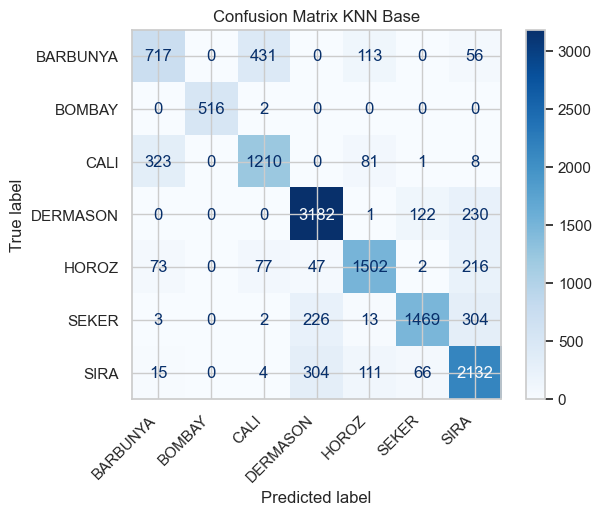

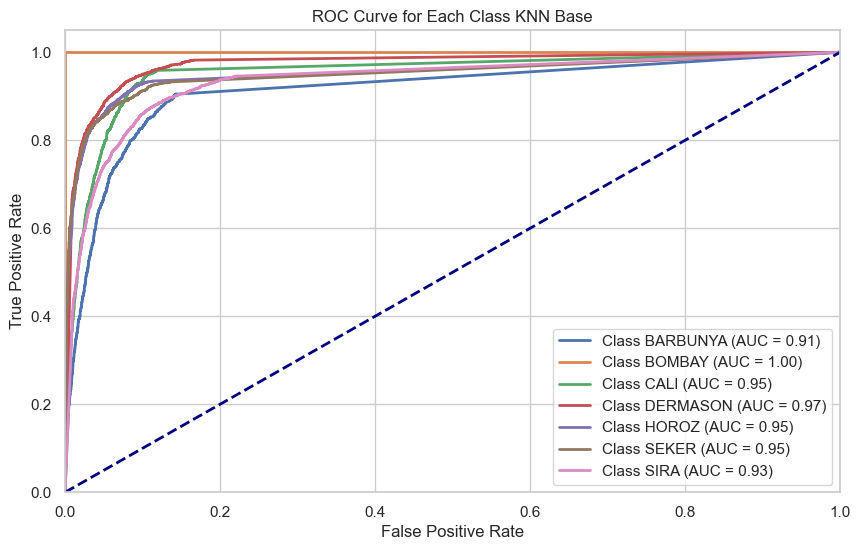

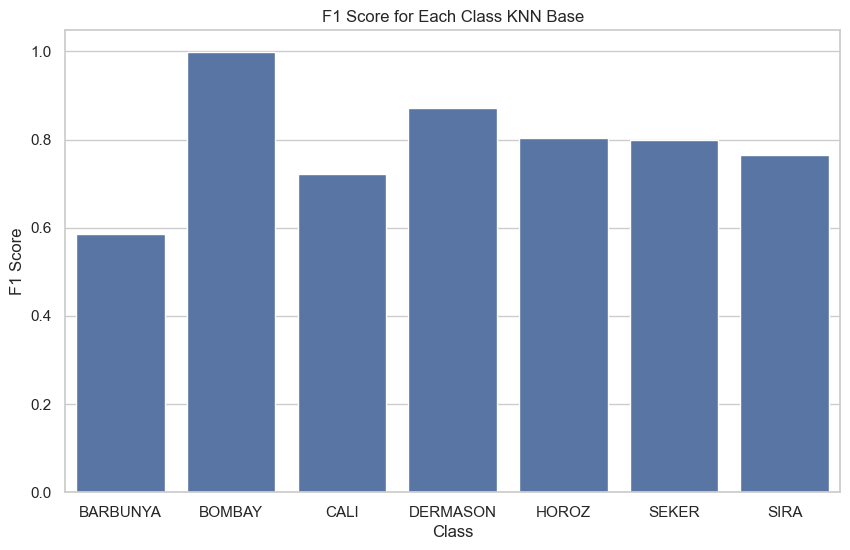

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel(file_path)
df.replace('?', np.nan, inplace=True)
print(df.columns)
# Drop rows with any missing values
df.dropna(inplace=True)

# Label encode the 'Color' feature
color_encoder = LabelEncoder()
df['Colour'] = color_encoder.fit_transform(df['Colour'])

# Separate features and target variable
X = df.drop(columns="Class")
y = df["Class"]

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 1: Define the model and parameters for Grid Search
max_k = int(np.sqrt(len(X)))
k_values = list(range(1, max_k + 1, 2))  # Use odd k values to avoid ties

param_grid = {
    'n_neighbors': k_values,
    'p': [1, 2],  # Minkowski distance with p=1 (Manhattan), p=2 (Euclidean)
    'algorithm': ['brute'],
    'weights': ['distance', 'uniform']
}

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Step 2: Grid Search with Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=kfold, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X, y_encoded)

# Get the best model from grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Step 3: Evaluate on the same data using cross-validation
y_pred = cross_val_predict(best_model, X, y_encoded, cv=kfold)

# Print the classification report
print("\n5-Fold Cross-Validation Classification Report:")
print(classification_report(y_encoded, y_pred))

# Step 4: Additional Analysis and Plots

# Confusion Matrix
cm = confusion_matrix(y_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')  

plt.title("Confusion Matrix KNN Base")
plt.show()

# ROC Curve and AUC for each class
plt.figure(figsize=(10, 6))
y_binarized = label_binarize(y_encoded, classes=np.unique(y_encoded))
y_pred_proba = cross_val_predict(best_model, X, y_encoded, cv=kfold, method='predict_proba')

for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class KNN Base')
plt.legend(loc="lower right")
plt.show()

# F1 Score Bar Plot
f1_scores = f1_score(y_encoded, y_pred, average=None)
plt.figure(figsize=(10, 6))
sns.barplot(x=label_encoder.classes_, y=f1_scores)
plt.title('F1 Score for Each Class KNN Base')
plt.ylabel('F1 Score')
plt.xlabel('Class')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}

5-Fold Cross-Validation Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1054
           1       1.00      1.00      1.00       414
           2       0.94      0.94      0.94      1298
           3       1.00      1.00      1.00      2828
           4       1.00      1.00      1.00      1534
           5       1.00      1.00      1.00      1614
           6       0.98      0.99      0.98      2105

    accuracy                           0.98     10847
   macro avg       0.98      0.98      0.98     10847
weighted avg       0.98      0.98      0.98     10847


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.92  

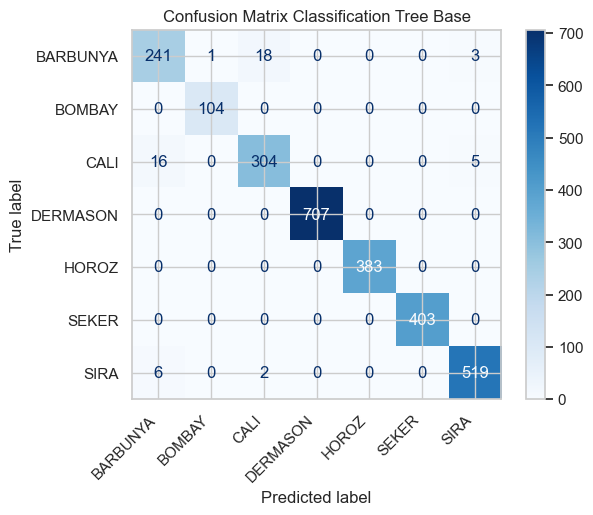

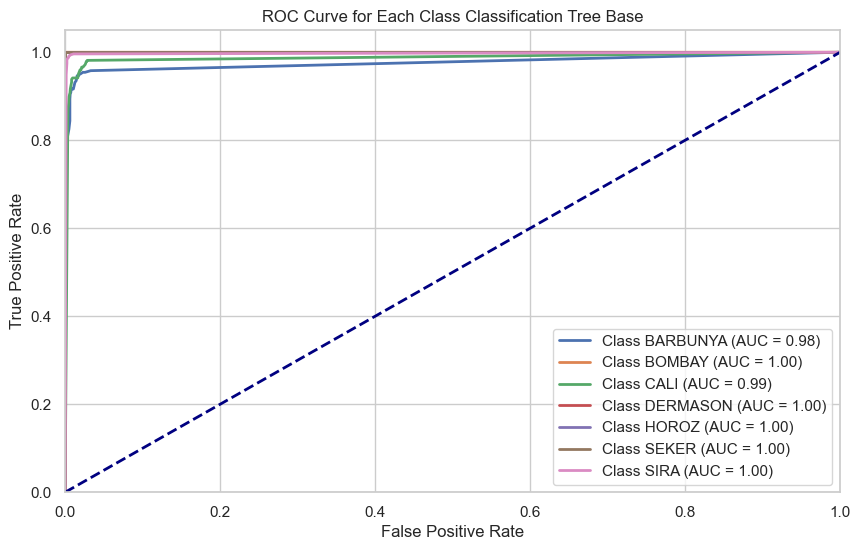

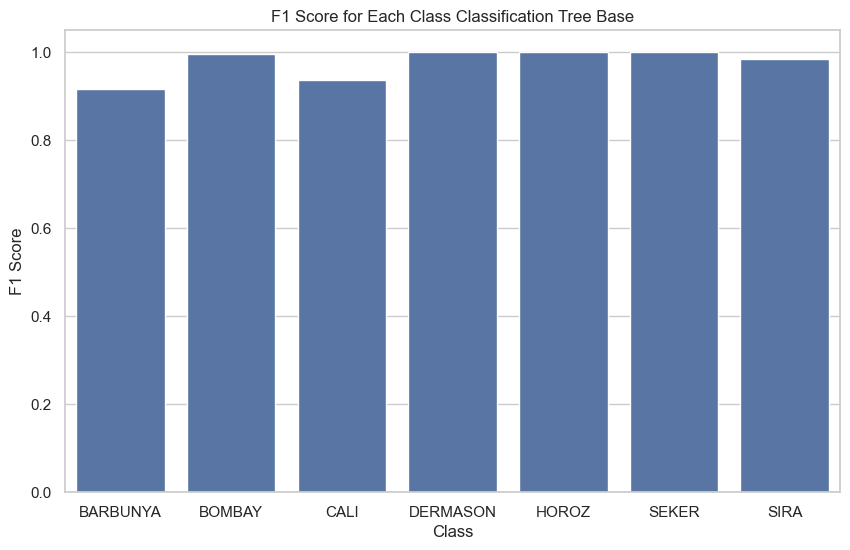

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel(file_path)
df.replace('?', np.nan, inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)

# Label encode the 'Colour' feature
color_encoder = LabelEncoder()
df['Colour'] = color_encoder.fit_transform(df['Colour'])

# Separate features and target variable
X = df.drop(columns="Class")
y = df["Class"]

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Step 1: Define the parameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],  # 'gini' or 'entropy' for impurity measure
    'max_depth': [None, 20, 30], 
    'min_samples_split': [2, 10, 20],  
    'min_samples_leaf': [1, 5, 10],  
    'splitter': ['best', 'random'],  
    'class_weight': [None, 'balanced'],  
}

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Step 2: Grid Search with Cross-Validation on the training set
grid_search = GridSearchCV(dtree, param_grid, cv=kfold, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Step 3: Evaluate on the training data using cross-validation
y_train_pred = cross_val_predict(best_model, X_train, y_train, cv=kfold)

# Print the classification report for the training data
print("\n5-Fold Cross-Validation Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Step 4: Evaluate on the test set
y_test_pred = best_model.predict(X_test)

# Print the classification report for the test set
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Step 5: Additional Analysis and Plots

# Confusion Matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')  

plt.title("Confusion Matrix Classification Tree Base")
plt.show()

# ROC Curve and AUC for each class on test set
plt.figure(figsize=(10, 6))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_test_pred_proba = best_model.predict_proba(X_test)

for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class Classification Tree Base')
plt.legend(loc="lower right")
plt.show()

# F1 Score Bar Plot for test set
f1_scores = f1_score(y_test, y_test_pred, average=None)
plt.figure(figsize=(10, 6))
sns.barplot(x=label_encoder.classes_, y=f1_scores)
plt.title('F1 Score for Each Class Classification Tree Base')
plt.ylabel('F1 Score')
plt.xlabel('Class')
plt.show()
